In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Import File & Aggregation
---

In [2]:
OT = pd.read_csv('wmsSheet.csv')

In [3]:
#把OT里出仓日期为NA的drop掉
OT = OT.dropna(subset=['出仓登记时间'])

In [4]:
TK = pd.read_csv('TK10.1-10.31.csv')

In [5]:
#把TK里取件日期为NA的drop掉
TK = TK.dropna(subset = ['取件日期(E)'])

In [6]:
#filter TK
TK = TK[['工作号','发货仓库','公司名','包装件数','取件日期(E)','业务员']]

In [7]:
KD1 = pd.read_csv('快递_小包1.csv', header = 1)
KD2 = pd.read_csv('快递_小包2.csv', header = 1)
KD3 = pd.read_csv('快递_小包3.csv', header = 1)

In [8]:
KD = KD = pd.concat([KD1, KD2, KD3], ignore_index=True)
KD

,工作号,发货仓库,公司名,货量,创建时间,取件日期(E),派送日期(E),包装件数,重量,体积,材积,货物品名,业务员,签收方式,签出/出仓时间,销售额,货值,CTN/MAWB#
0,KD23102376860,NaN,nagog-Jessica,SP-320-2 X 1; 20KGS 0.0379CBM,2023-10-09 22:25:47,2023-10-09 23:00:00,2023-10-17 23:00:00,1.0,20.00,0.0379,20.00,NaN,客服2,NaN,2023-10-09 22:27:16,NaN,NaN,NaN
1,KD23102376859,NaN,nagog-Jessica,SP-320-2 X 1; 20KGS 0.0379CBM,2023-10-09 22:23:43,2023-10-09 23:00:00,2023-10-17 23:00:00,1.0,20.00,0.0379,20.00,NaN,客服2,NaN,2023-10-09 22:24:37,NaN,NaN,NaN
2,KD23102376858,NaN,nagog-Jessica,SP-320-2 X 1; 20KGS 0.0379CBM,2023-10-09 22:21:08,2023-10-09 23:00:00,2023-10-17 23:00:00,1.0,20.00,0.0379,20.00,NaN,客服2,NaN,2023-10-09 22:22:10,NaN,NaN,NaN
3,KD23102376857,NaN,nagog-Jessica,SP-75-1 X 1; 14KGS 0.0603CBM,2023-10-09 22:18:58,2023-10-09 23:00:00,2023-10-17 23:00:00,1.0,14.00,0.0603,14.00,NaN,客服2,NaN,2023-10-09 22:20:19,NaN,NaN,NaN
4,KD23102376856,NaN,nagog-Jessica,SP-75-1 X 1; 14KGS 0.0603CBM,2023-10-09 22:17:24,2023-10-09 23:00:00,2023-10-17 23:00:00,1.0,14.00,0.0603,14.00,NaN,客服2,NaN,2023-10-09 22:18:02,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23899,KD23092367414,NaN,LT,L12V100-100-BASIC-4-A100 X 2; 19.6KGS 0.0489CBM,9/28/23 00:53,9/27/23 23:00,10/26/23 23:00,2.0,19.6,0.0489,19.6,NaN,客服2,NaN,10/23/23 09:06,NaN,NaN,NaN
23900,KD23092362513,NaN,LT CHECK,L12V100-100-BASIC-4-A100 X 2; 21.6KGS 0.0597CBM,9/20/23 18:27,9/20/23 23:00,10/27/23 23:00,2.0,21.6,0.0597,21.6,NaN,客服2,NaN,10/26/23 14:48,NaN,NaN,NaN
23901,KD23092356909,NaN,APT CHECK,A12V200-200-Plus-8-A160 X 1; A12V200-200-Plus-...,9/11/23 02:05,9/10/23 23:00,10/25/23 23:00,2.0,44.0,0.1044,44.0,NaN,客服2,NaN,10/23/23 16:14,NaN,NaN,NaN
23902,KD23082346142,NaN,LT CHECK,L12V200-200-Plus-8-A160 X 1; 22KGS 0.0522CBM,8/28/23 00:46,8/27/23 23:00,10/26/23 23:00,1.0,22.0,0.0522,22.0,NaN,客服2,NaN,10/24/23 14:01,NaN,NaN,NaN


Data Cleaning & Manipulation
---

In [9]:
#重新命名仓库
replace_dict = {
    '20450': 'CA2',
    '20301 洛杉矶' : 'CA2',
    'WNT485': 'CA1',
    '425' : 'CA1',
    'NJ9': 'NJ',
    '3270': 'GA',
    'PDX': 'OR',
    '芝加哥 360': 'IL',
    '8828 Houston': 'TX',
    float('nan'): 'unknown'
}
TK['发货仓库'] = TK['发货仓库'].replace(replace_dict)
TK['发货仓库'].value_counts()

CA1        41
NJ          8
GA          5
OR          3
TX          1
CA2         1
unknown     1
Name: 发货仓库, dtype: int64

In [10]:
OT['库房名称'] = OT['库房名称'].replace(replace_dict)
OT['库房名称'].value_counts()

CA1        1089
CA2         192
OR          172
TX          164
NJ          156
GA           20
IL            5
Norwalk       2
unknown       1
Name: 库房名称, dtype: int64

In [11]:
KD['库房名称'] = KD['发货仓库'].replace(replace_dict)
KD['库房名称'].value_counts()

CA1        16055
TX          2886
GA          2684
NJ          1604
unknown      349
CA2          220
OR            96
IL            10
Name: 库房名称, dtype: int64

In [12]:
#rename columns
OT = OT.rename(columns = {'客户名称':'company','工作号':'work_id','出仓登记时间':'date','出仓件数':'count','库房名称':'warehouse','业务员':'operator'})
TK = TK.rename(columns = {'公司名':'company','工作号':'work_id','取件日期(E)':'date','包装件数':'count','发货仓库':'warehouse','业务员':'operator'})
KD = KD.rename(columns = {'公司名':'company','工作号':'work_id','签出/出仓时间':'date','包装件数':'count','库房名称':'warehouse','业务员':'operator'})

In [13]:
#reorder
OT = OT[['work_id','warehouse','company','count','date','operator']]
TK = TK[['work_id','warehouse','company','count','date','operator']]
KD = KD[['work_id','warehouse','company','count','date','operator']]

In [14]:
#转换时间
KD['date'] = pd.to_datetime(KD['date'])
KD['date'] = KD['date'].dt.date

In [15]:
TK['date'] = TK['date'].str.strip('""')

In [16]:
#format the date column into datetime obj.
OT['date'] = pd.to_datetime(OT['date']).dt.date
TK['date'] = pd.to_datetime(TK['date']).dt.date

In [17]:
#concat all df to final one
df = pd.concat([OT, TK, KD], ignore_index=True)

In [18]:
#加入variable: weekday
df['weekdays'] = pd.to_datetime(df['date']).dt.day_name()

In [19]:
#drop rows where company is NULL
df = df.dropna(subset= ['company'])

In [20]:
#duplicate names because of non-standardized record Format
df['operator'].value_counts()

客服2              15020
yao               4480
S willa           2585
yao               1004
Jack               740
客服2                420
wang chen          333
Jack               190
客服3                151
cong xiaolong      133
bill                71
chen chongwei       57
wang 小宇             46
Bill                37
lu tony             17
li baitao           11
Li Sean             10
liu yang             5
bill                 1
L bobby              1
Name: operator, dtype: int64

In [21]:
df['operator'] = df['operator'].str.replace('客服2 ', '客服2')
df['operator'] = df['operator'].str.replace('Jack ', 'Jack')
df['operator'] = df['operator'].str.replace('yao ', 'yao')
df['operator'] = df['operator'].str.replace('bill ', 'bill')
df['operator'] = df['operator'].str.replace('bill', 'Bill')
df['operator'] = df['operator'].str.replace('Bill ', 'Bill')
df['operator'].value_counts()

客服2              15440
yao               5484
S willa           2585
Jack               930
wang chen          333
客服3                151
cong xiaolong      133
Bill               109
chen chongwei       57
wang 小宇             46
lu tony             17
li baitao           11
Li Sean             10
liu yang             5
L bobby              1
Name: operator, dtype: int64

Descriptive Statistics
---

In [22]:
lst = df.columns
for i in lst:
    print(i + ': ' + str(df[i].isna().sum()))

work_id: 1801
warehouse: 0
company: 0
count: 4
date: 0
operator: 433
weekdays: 0


In [23]:
df.describe()

,count
count,25741.000000
mean,10.642205
std,84.537087
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,3660.000000


given we have 25741 number of rows, the maximum count is 3660 while the mean count is only 10.6 and around 80-90 percent of rows only have 1 count, implying the majority of goods outputed this month are single good from probably small retailers. 

In [24]:
df.groupby('warehouse')['count'].sum().reset_index(name = 'numbers').sort_values('numbers', ascending = False)

,warehouse,numbers
0,CA1,201473.0
1,CA2,25880.0
6,OR,17822.0
4,NJ,15025.0
7,TX,6890.0
2,GA,4515.0
8,unknown,832.0
5,Norwalk,812.0
3,IL,692.0


combining with the pie chart that graphs the share of warehouses in the overall monthly output, CA took almost 85% of the overall output while warehoues such as IL, GA, TX were a bit struggling as their outputs were below 10,000 in terms of count, especially IL which couldn't even reach 1,000.

In [25]:
df.groupby('company')['count'].sum().reset_index(name = 'numbers').sort_values('numbers', ascending = False).head(15)

,company,numbers
5572,Hesung Innovation Corp,144423.0
10884,Orbitel Global Services LLC,21240.0
9903,Mega Home Inc.,16637.0
4911,GIFTABLE WORLD INC.,12078.0
5609,Homeangel,10886.0
4714,"FUJITSU GENERAL AMERICA, INC.",8446.0
14514,Vegogarden,7335.0
7685,KTGWorldWide,6009.0
15021,abc,4767.0
12591,SUPREME SOURCE & SUPPLY CO,1777.0


These are the top 15 clients in terms of goods count. We could track whether our top clients are using the express service as well. If not, it would be a great opportunity for revenue growth if we could have them enroll in our express service. 

In [26]:
#group mapping: 把业务员对应到相应的组，看相应的组出货情况
group_mapping = {
    '客服2': 'Eason',
    'yao': 'Long',
    'S willa': 'Sam',
    'Jack': 'Long',
    'wang chen': 'Kevin',
    '客服3': 'Sam',
    'cong xiaolong': 'Long',
    'Bill': 'Kevin',
    'chen chongwei': 'Eason',
    'wang 小宇': 'Kevin',
    'lu tony': 'Eason',
    'li baitao': 'Kevin',
    'Li Sean': 'Eason',
    'liu yang': 'Sam',
    'L bobby': 'Long',
}

In [27]:
df['group'] = df['operator'].map(group_mapping)

In [28]:
df.groupby('group')['count'].sum().reset_index(name = 'total').sort_values('total', ascending = False)

,group,total
2,Long,160793.0
0,Eason,79224.0
1,Kevin,11431.0
3,Sam,6095.0


These numbers show the count of goods each group outputed in the month of October. We are able to tell how much work each group finished in order to determine their kpi and also how much space each group actually need in terms of goods count, though it would be more accurate in terms of space if we are also given the the size of goods (the size column in some of the rows is NA)(probably due to the fact that some orders contain multiple goods and thus unable to label the size of the order.)

Data Visualizations
---

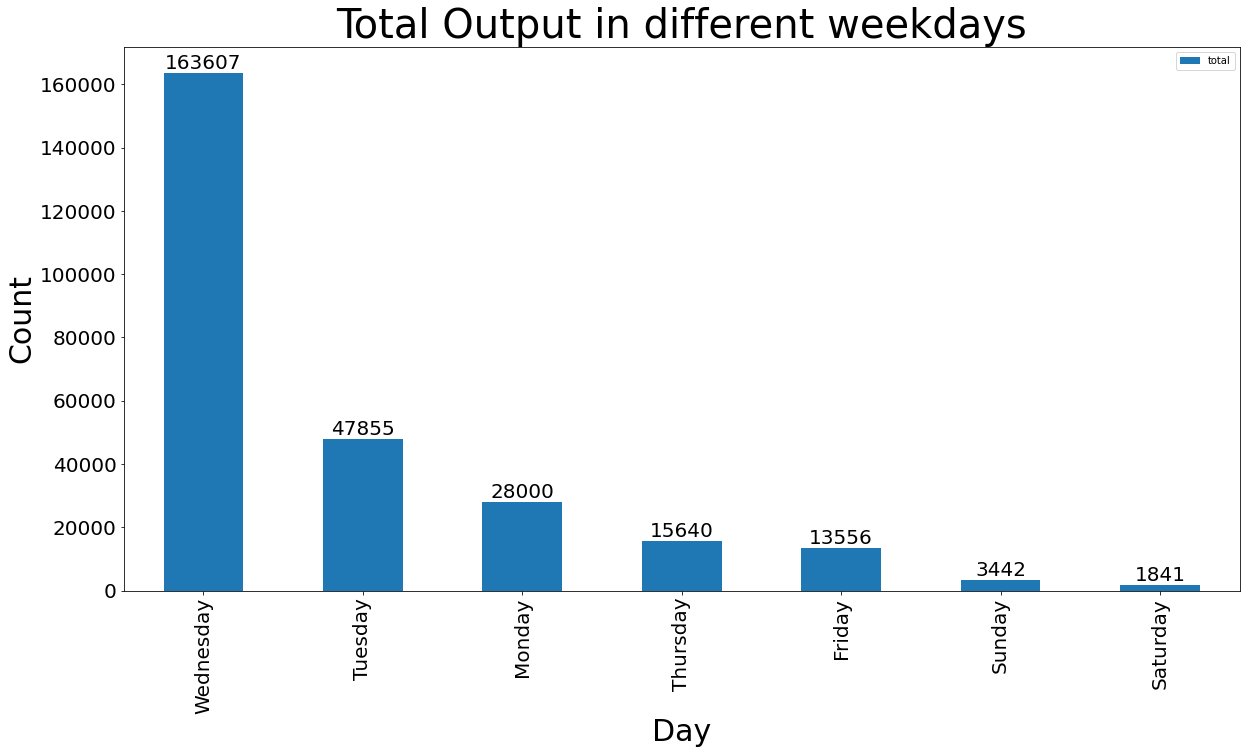

In [29]:
# sort by weekdays to see each day's output, using bar graph
df_sort_by_weekdays = df.groupby('weekdays')['count'].sum().reset_index(name = 'total').sort_values('total',ascending=False)
df_sort_by_weekdays.plot('weekdays', 'total', kind = 'bar', figsize = (20, 10),fontsize= 20)
plt.title('Total Output in different weekdays',fontsize = 40)
plt.xlabel('Day',fontsize = 30)
plt.ylabel('Count',fontsize = 30)
for bar in plt.gca().patches:  # gca() - get current axes, patches is a list of bars.
    plt.text(bar.get_x() + bar.get_width() / 2,  # x-coordinate position of text
             bar.get_height(),  # y-coordinate position of text
             f'{int(bar.get_height())}',  # Text to be displayed on top of the bar
             ha='center',  # center alignment for the text
             va='bottom',  # bottom alignment for the text
             fontsize=20)  # font size of text
plt.show()
#from this graph, we are able to see

This is a graph that shows the sum of output in each weekdays for the month of October. We could tell which days in a week are the most busy and workers might need to work overtime to finish. This could possibly reduce labor cost in the way that it identifies meaningless overtime work.
If we refer to the line graph of Hesung's output, Hesung is the main reason for why Wednesday is a much taller bar comparing to other days as workers recorded Hesung's output in the system in one single day. This is severely interrupting us from generating the actual graph of weekdays output and further from predicitng future warehouses' output since we need the data to be unbiased to run machine learning models.

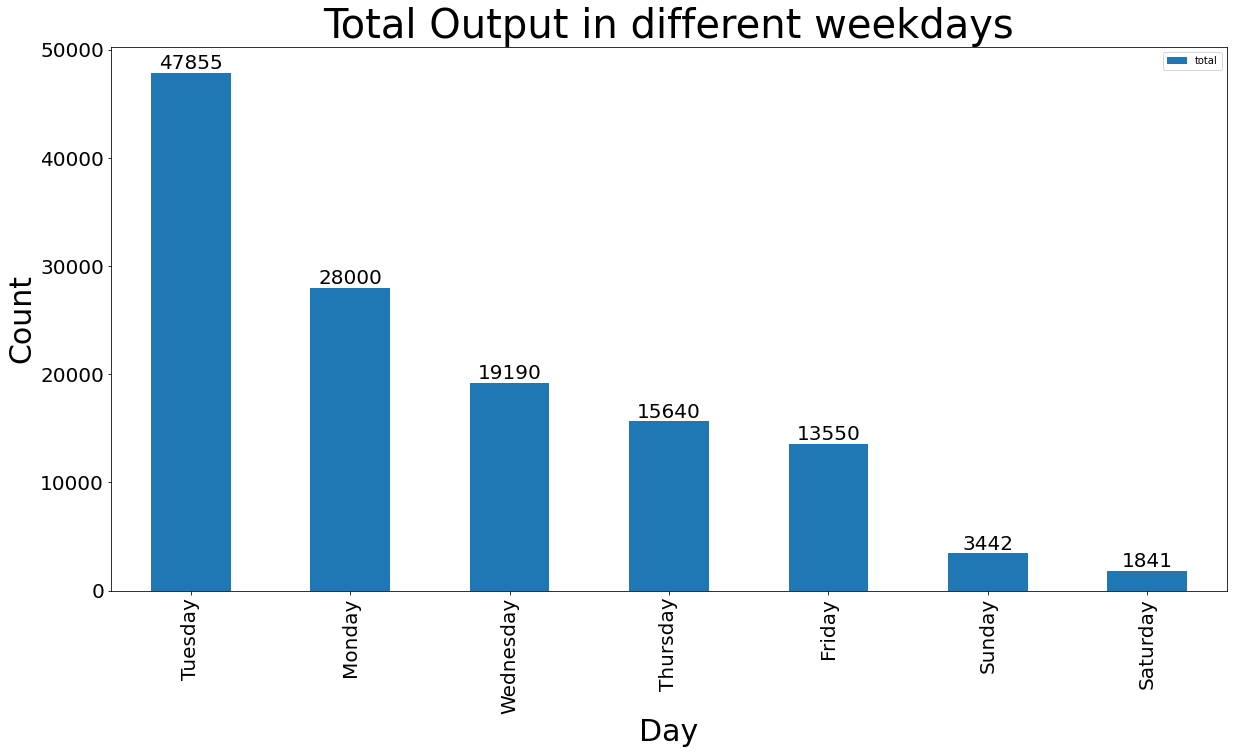

In [30]:
# sort by weekdays to see each day's output, using bar graph (eliminating Hesung)
df_sort_by_weekdays = df[df['company'] != 'Hesung Innovation Corp'].groupby('weekdays')['count'].sum().reset_index(name = 'total').sort_values('total',ascending=False)
df_sort_by_weekdays.plot('weekdays', 'total', kind = 'bar', figsize = (20, 10),fontsize= 20)
plt.title('Total Output in different weekdays',fontsize = 40)
plt.xlabel('Day',fontsize = 30)
plt.ylabel('Count',fontsize = 30)
for bar in plt.gca().patches:  # gca() - get current axes, patches is a list of bars.
    plt.text(bar.get_x() + bar.get_width() / 2,  # x-coordinate position of text
             bar.get_height(),  # y-coordinate position of text
             f'{int(bar.get_height())}',  # Text to be displayed on top of the bar
             ha='center',  # center alignment for the text
             va='bottom',  # bottom alignment for the text
             fontsize=20)  # font size of text
plt.show()

After eliminating Hesung in the weekdays output graph, Tuesday surpasses Wednesday to become the day that is outputting the most. This supports the hypothesis we made previously that Wednesday seems to be a heavy day only because workers were recording the output all at once. But if we look at the line graph of Orbitel's output, we could tell that the reason why Tuesday is the tallest bar in the graph is because workers are again recording Orbitel's output all in one day, again making the data extremely biased and failed us from making accurate predictions of the actual output of each weekdays, given the accuracy of such prediction could be vital in effectively and efficiently reducing company's labor cost.

In [31]:
# sort by warehouse to see each's output, using both bar and pie graph
df_sort_by_warehouse = df.groupby('warehouse')['count'].sum().reset_index().sort_values('count',ascending=False)

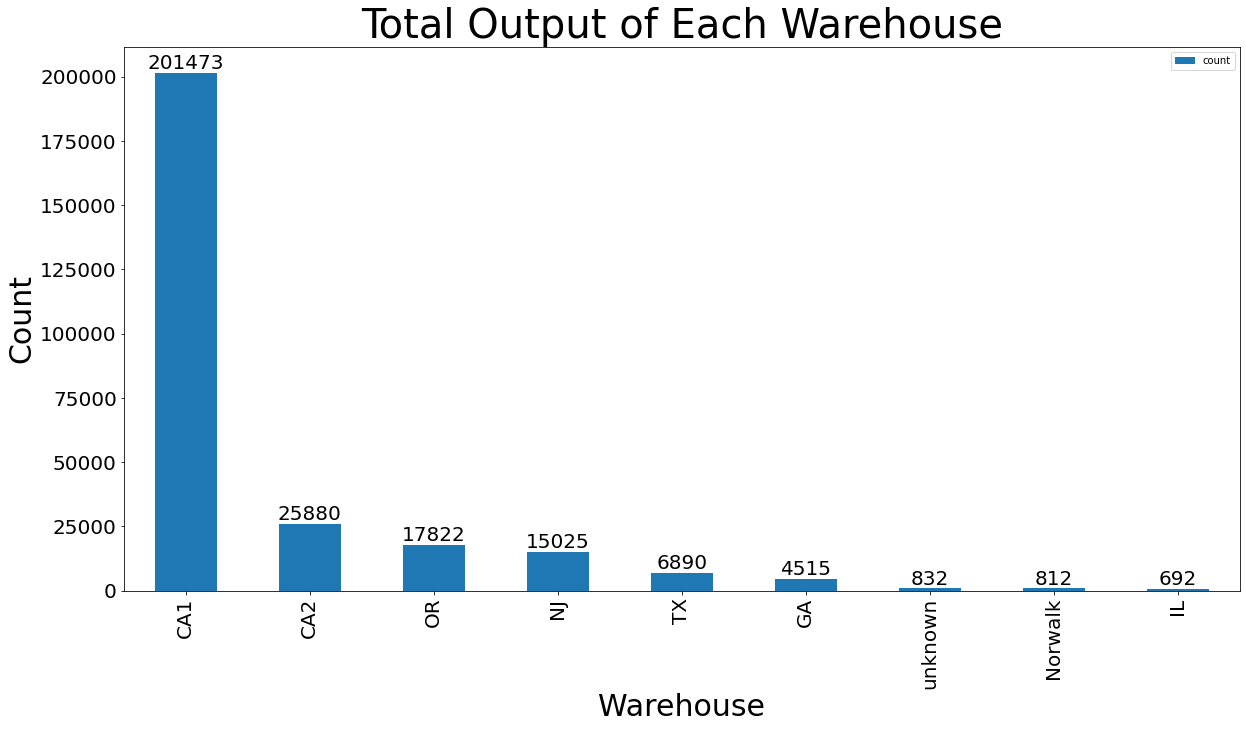

In [32]:
#bar graph
df_sort_by_warehouse.plot('warehouse', 'count', kind = 'bar', figsize = (20, 10),fontsize= 20)
plt.title('Total Output of Each Warehouse',fontsize = 40)
plt.xlabel('Warehouse',fontsize = 30)
plt.ylabel('Count',fontsize = 30)
for bar in plt.gca().patches:  # gca() - get current axes, patches is a list of bars.
    plt.text(bar.get_x() + bar.get_width() / 2,  # x-coordinate position of text
             bar.get_height(),  # y-coordinate position of text
             f'{int(bar.get_height())}',  # Text to be displayed on top of the bar
             ha='center',  # center alignment for the text
             va='bottom',  # bottom alignment for the text
             fontsize=20)  # font size of text

# Display the plot
plt.show()

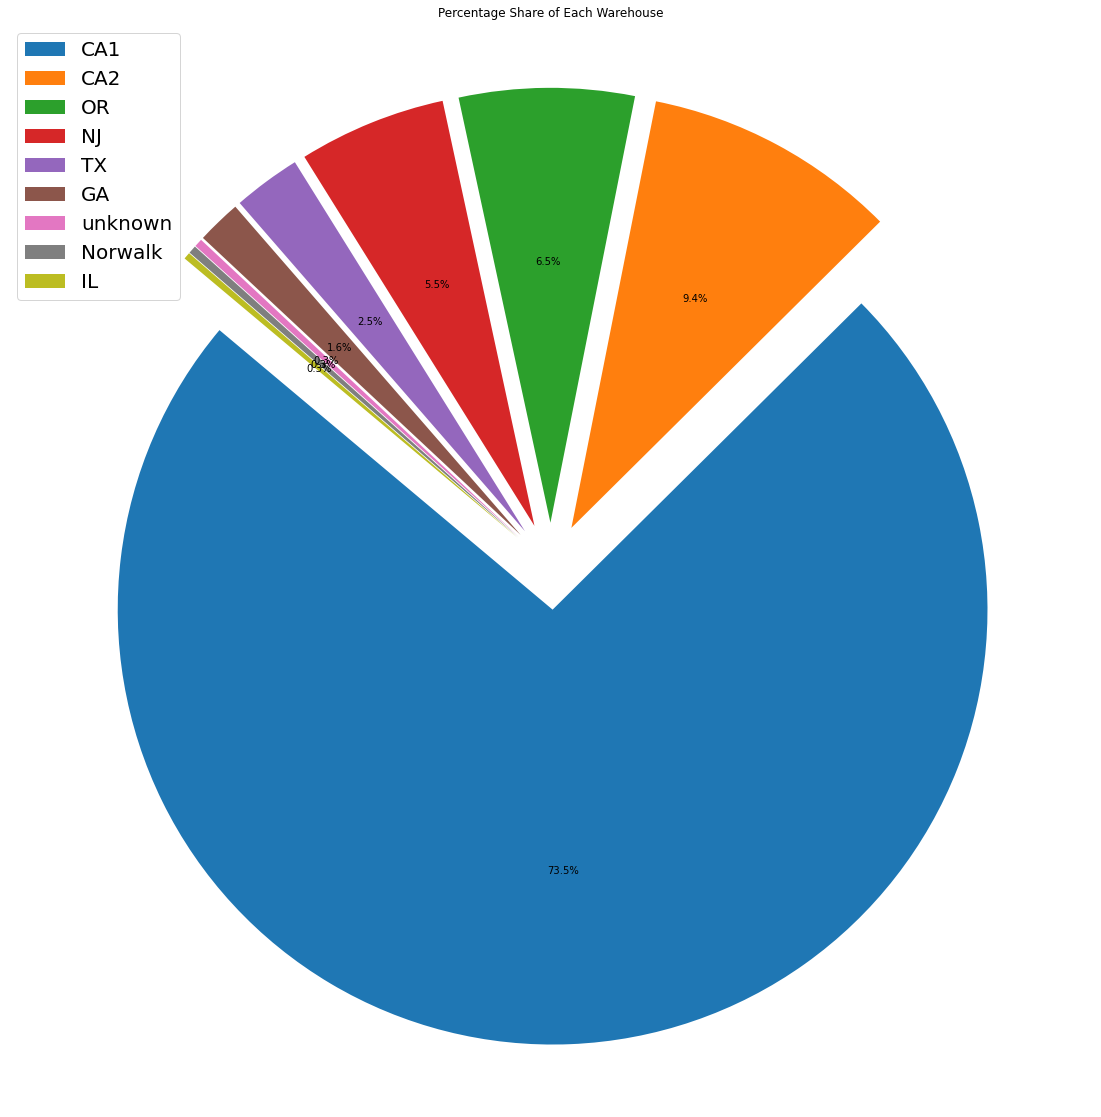

In [33]:
#pie 
plt.figure(figsize=(20, 20))

explode = [0.1] * len(df_sort_by_warehouse)

# 绘制饼图
plt.pie(df_sort_by_warehouse['count'], autopct='%1.1f%%', startangle=140, explode=explode)
plt.legend(labels=df_sort_by_warehouse['warehouse'], loc='upper left',fontsize = 20)
# 添加标题
plt.title('Percentage Share of Each Warehouse')

# 显示饼图
plt.show()

The bar and pie graph are all visualization of the company's warehouse peformance. They correspond to the warehouses' output descriptive statistics.

In [34]:
#sort by top 9 companies, rest are grouped as 'others'
top_9_company = df.groupby('company')['count'].sum().reset_index().sort_values('count',ascending=False).head(9)
others = df['count'].sum() - top_9_company['count'].sum()
other_companies = pd.DataFrame({'company':['others'],'count':[others]})
top_9_others = pd.concat([top_9_company,other_companies])

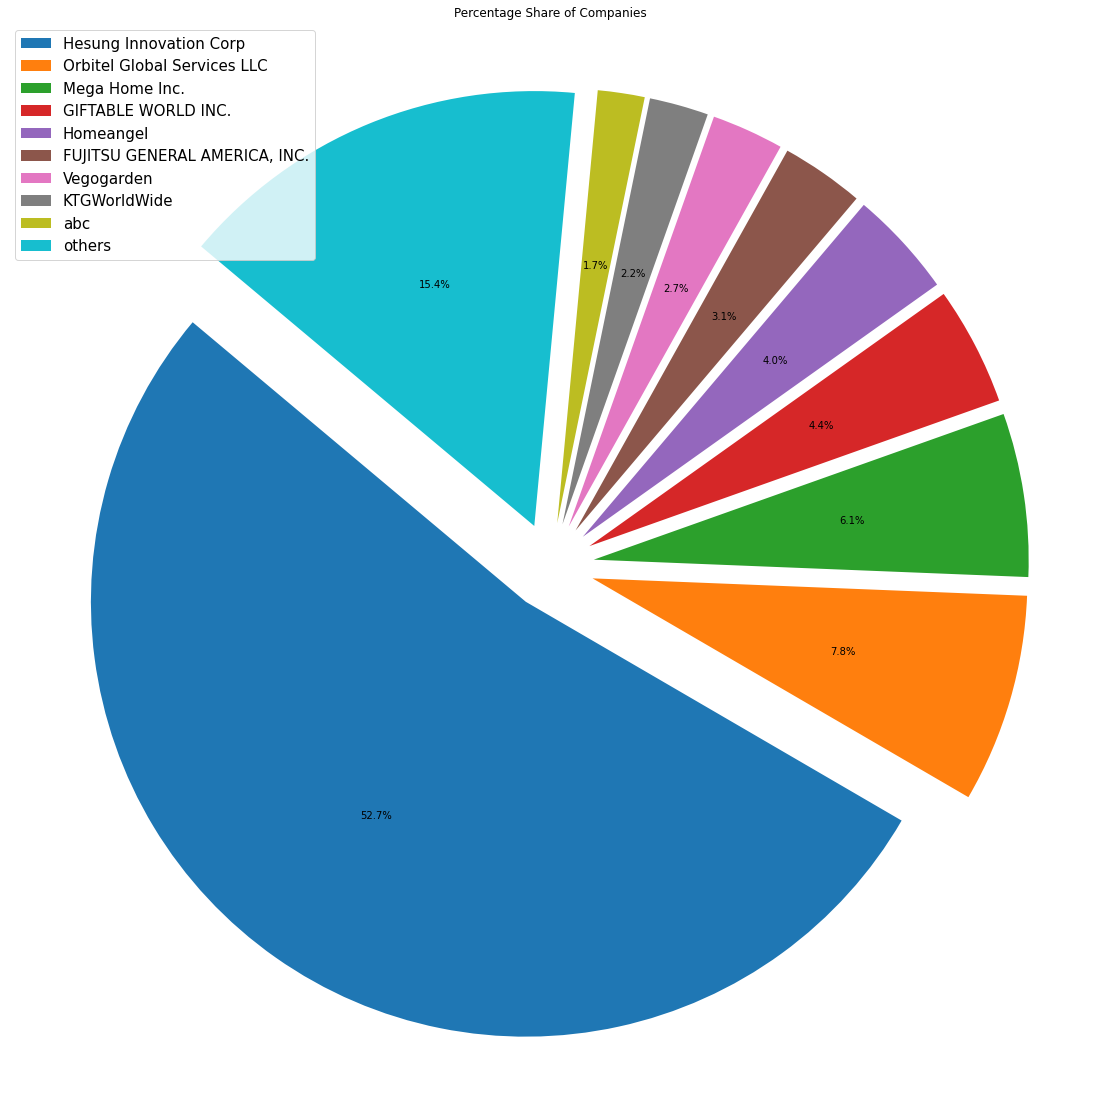

In [35]:
#pie chart with top 9 and others 
plt.figure(figsize=(20, 20))

explode = [0.1] * len(top_9_others)

# 绘制饼图
plt.pie(top_9_others['count'], autopct='%1.1f%%', startangle=140, explode=explode,)
plt.legend(labels=top_9_others['company'], loc='upper left',fontsize = 15)
# 添加标题
plt.title('Percentage Share of Companies')

# 显示饼图
plt.show()

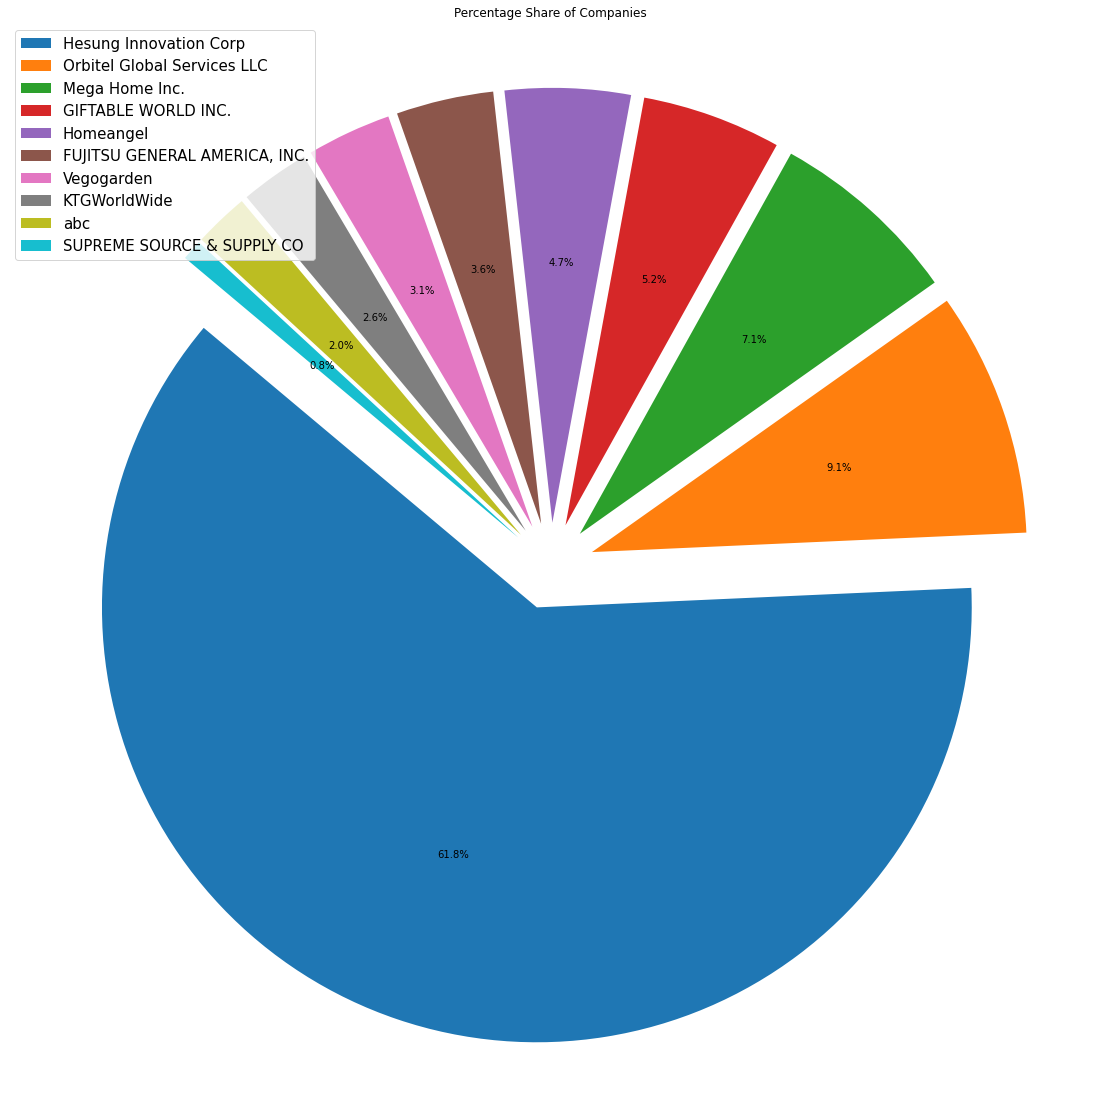

In [36]:
#pie chart with only top 10 
top_10_company = df.groupby('company')['count'].sum().reset_index().sort_values('count',ascending=False).head(10)
plt.figure(figsize=(20, 20))
explode = [0.1] * len(top_10_company)
# 绘制饼图
plt.pie(top_10_company['count'], autopct='%1.1f%%', startangle=140, explode=explode,)
plt.legend(labels=top_10_company['company'], loc='upper left',fontsize = 15)
# 添加标题
plt.title('Percentage Share of Companies')
# 显示饼图
plt.show()

This graph visualizes the previous statistics on company's top 10 clients in terms of goods count. If we could combine the amount with the revenue, it would be a great add-on to help understand company's top clients in terms of share of revenue.

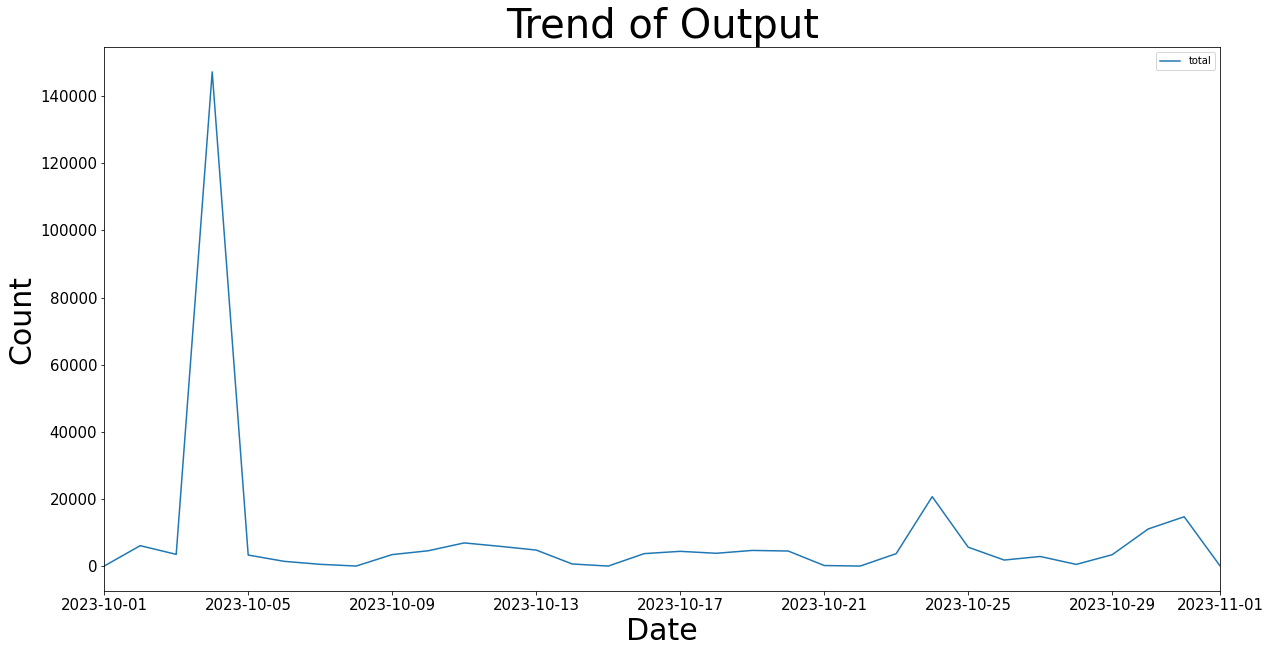

In [37]:
#trend of overall output in October using line graph
df_sort_by_date = df.groupby('date')['count'].sum().reset_index(name = 'total')
df_sort_by_date.plot('date','total',figsize=(20,10),fontsize=15)
plt.title("Trend of Output",fontsize = 40)
plt.xlabel("Date",fontsize = 30)
plt.ylabel("Count",fontsize = 30)
plt.xlim(pd.Timestamp('2023-10-01'), df_sort_by_date['date'].max())
plt.show()

The line graph of overall output is intended to visualize the trend of the output, which we could gain insights in business cycle, and if the graph is of an entire yearl we could also observe the seasonal fluctuation of warehoues output. 

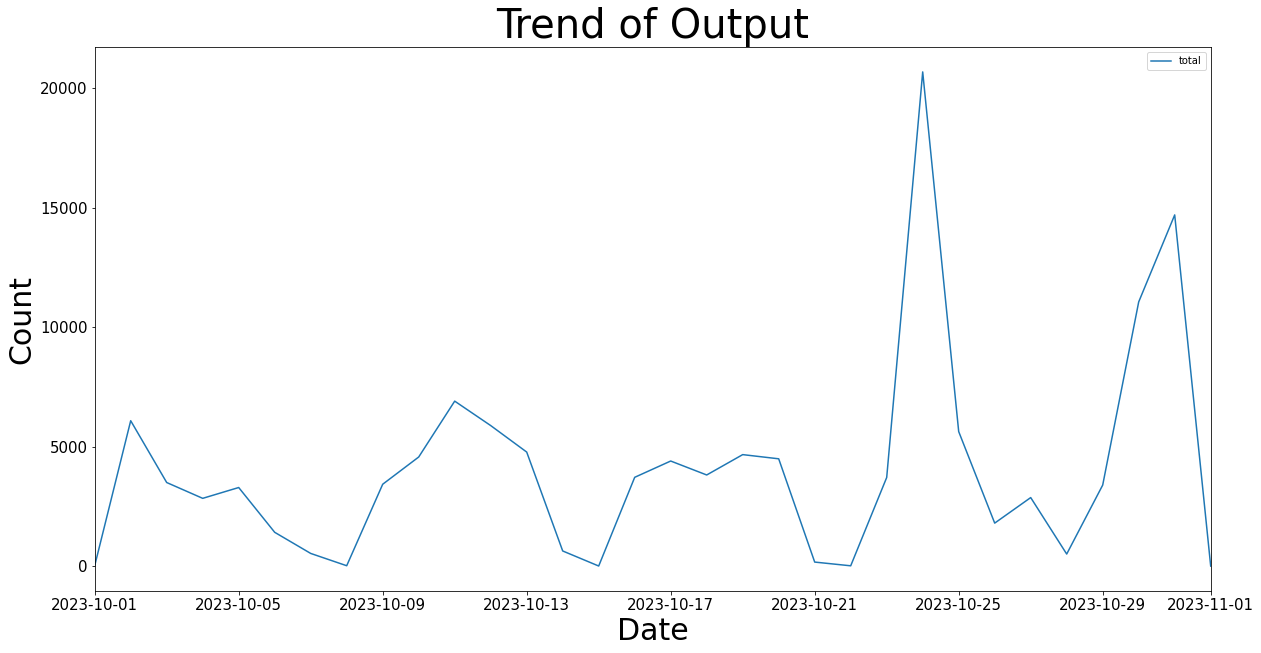

In [38]:
#trend of overall output in October using line graph(eliminating Hesung)
df_sort_by_date = df[df['company'] != 'Hesung Innovation Corp'].groupby('date')['count'].sum().reset_index(name = 'total')
df_sort_by_date.plot('date','total',figsize=(20,10),fontsize=15)
plt.title("Trend of Output",fontsize = 40)
plt.xlabel("Date",fontsize = 30)
plt.ylabel("Count",fontsize = 30)
plt.xlim(pd.Timestamp('2023-10-01'), df_sort_by_date['date'].max())
plt.show()

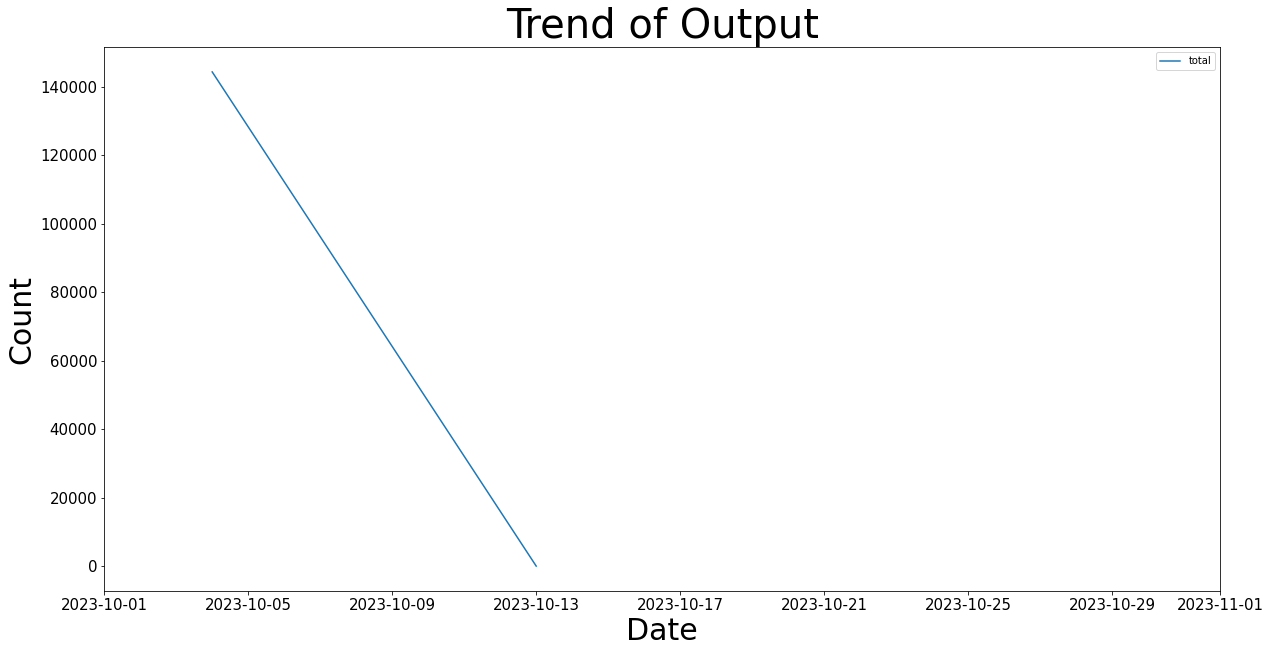

In [39]:
#Hesung's output using line graph
Hesung_sort_by_date = df[df['company'] == 'Hesung Innovation Corp'].groupby('date')['count'].sum().reset_index(name = 'total')
Hesung_sort_by_date.plot('date','total',figsize=(20,10),fontsize=15)
plt.title("Trend of Output",fontsize = 40)
plt.xlabel("Date",fontsize = 30)
plt.ylabel("Count",fontsize = 30)
plt.xlim(pd.Timestamp('2023-10-01'), df_sort_by_date['date'].max())
plt.show()

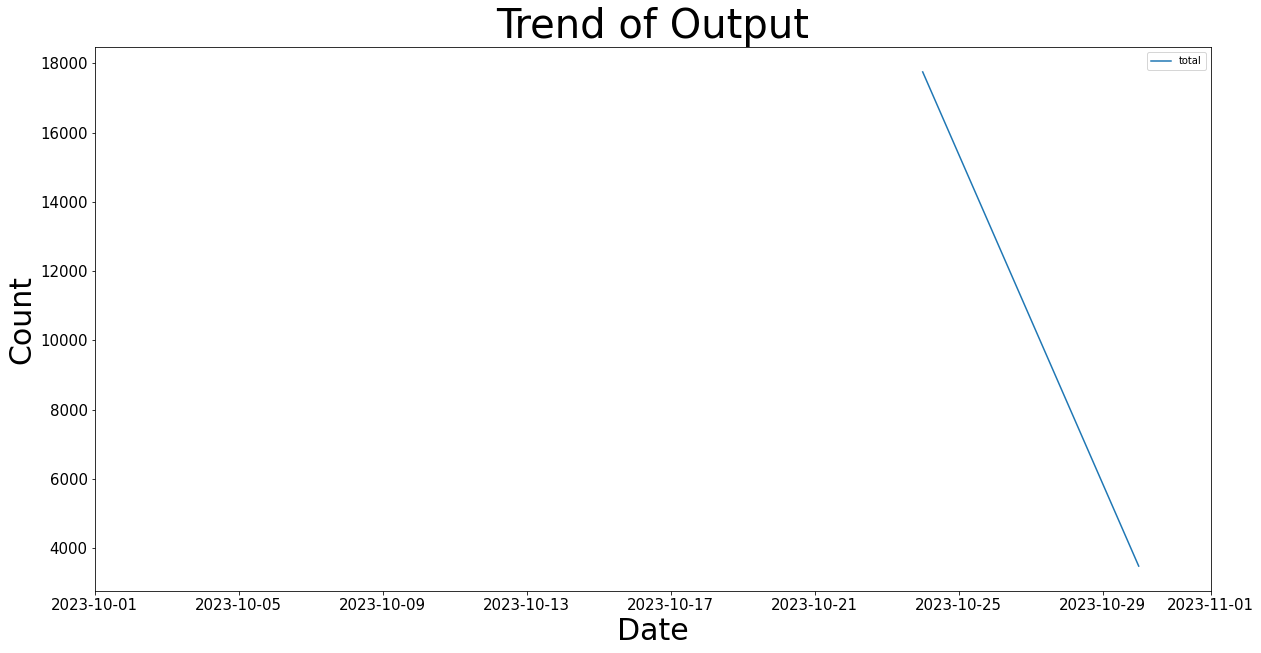

In [40]:
#orbital's output using line graph
orbital_sort_by_date = df[df['company'] == 'Orbitel Global Services LLC'].groupby('date')['count'].sum().reset_index(name = 'total')
orbital_sort_by_date.plot('date','total',figsize=(20,10),fontsize=15)
plt.title("Trend of Output",fontsize = 40)
plt.xlabel("Date",fontsize = 30)
plt.ylabel("Count",fontsize = 30)
plt.xlim(pd.Timestamp('2023-10-01'), df_sort_by_date['date'].max())
plt.show()

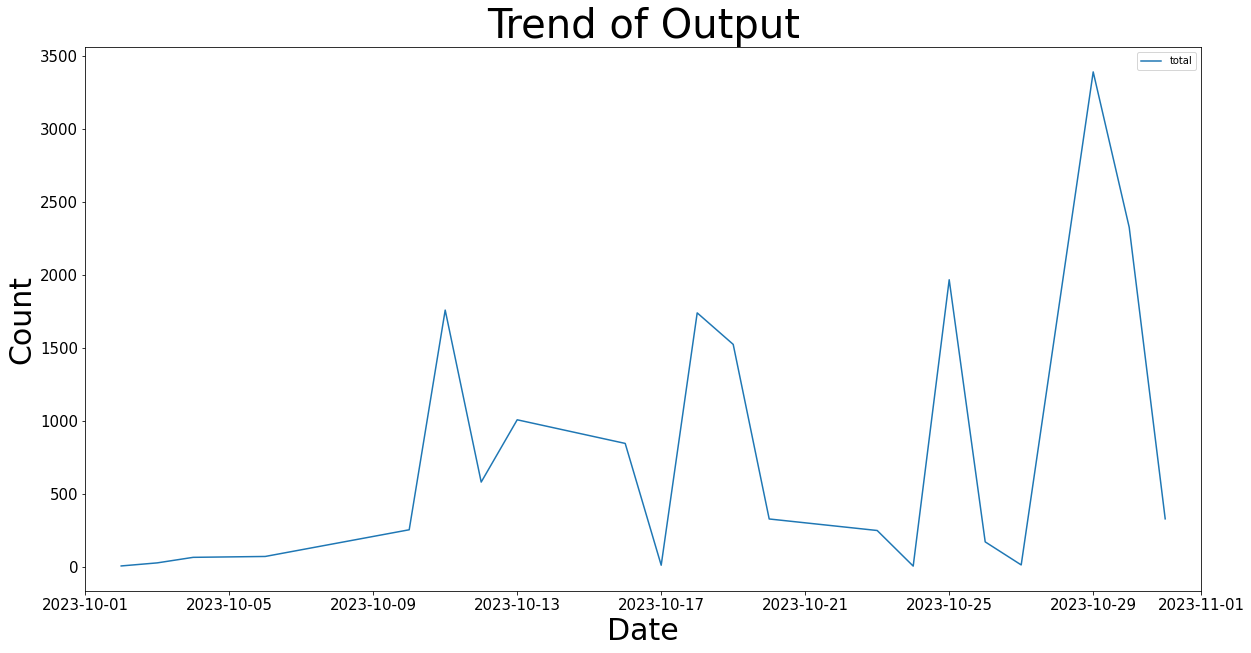

In [41]:
#Mega home's output using ine graph
mega_sort_by_date = df[df['company'] == 'Mega Home Inc.'].groupby('date')['count'].sum().reset_index(name = 'total')
mega_sort_by_date.plot('date','total',figsize=(20,10),fontsize=15)
plt.title("Trend of Output",fontsize = 40)
plt.xlabel("Date",fontsize = 30)
plt.ylabel("Count",fontsize = 30)
plt.xlim(pd.Timestamp('2023-10-01'), df_sort_by_date['date'].max())
plt.show()

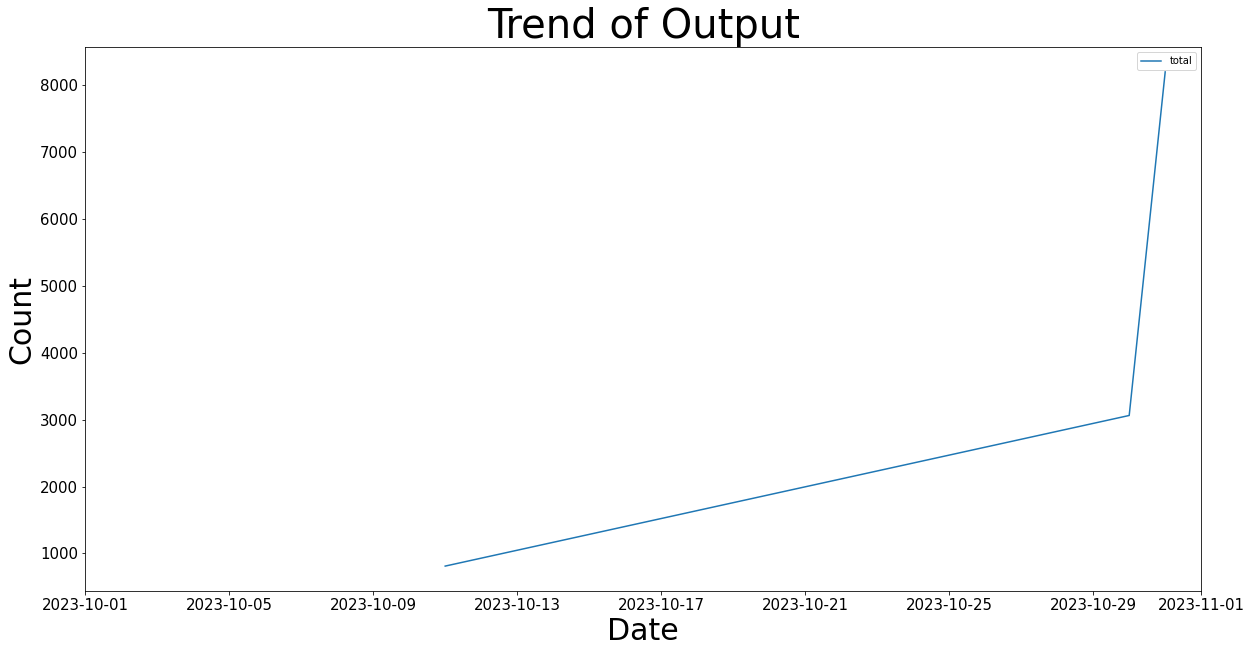

In [42]:
#Giftable's output using line graph
Giftable_sort_by_date = df[df['company'] == 'GIFTABLE WORLD INC.'].groupby('date')['count'].sum().reset_index(name = 'total')
Giftable_sort_by_date.plot('date','total',figsize=(20,10),fontsize=15)
plt.title("Trend of Output",fontsize = 40)
plt.xlabel("Date",fontsize = 30)
plt.ylabel("Count",fontsize = 30)
plt.xlim(pd.Timestamp('2023-10-01'), df_sort_by_date['date'].max())
plt.show()

Giftable, 4th largest clients in warehouse in terms of amount of goods. Again its output has been recorded in a un-standard manner. Just for convenience, workers recorded Giftable's monthly output in only 3 days. 

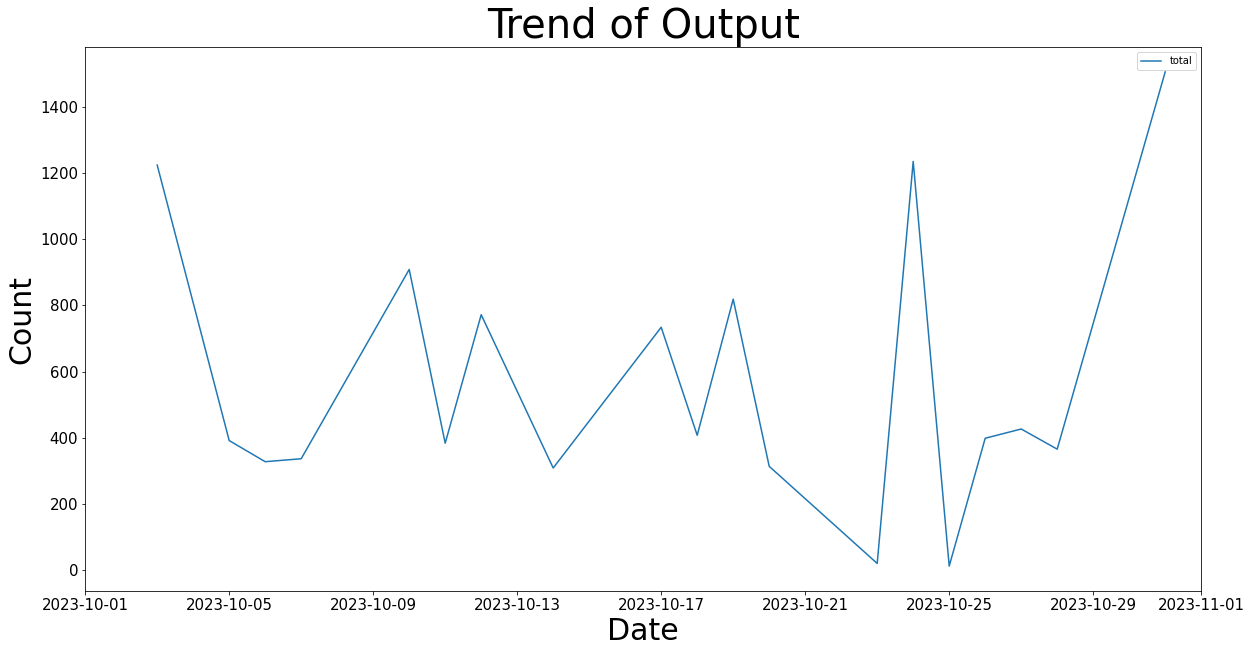

In [43]:
#Homeangel's output using line graph
Homeangel_sort_by_date = df[df['company'] == 'Homeangel'].groupby('date')['count'].sum().reset_index(name = 'total')
Homeangel_sort_by_date.plot('date','total',figsize=(20,10),fontsize=15)
plt.title("Trend of Output",fontsize = 40)
plt.xlabel("Date",fontsize = 30)
plt.ylabel("Count",fontsize = 30)
plt.xlim(pd.Timestamp('2023-10-01'), df_sort_by_date['date'].max())
plt.show()

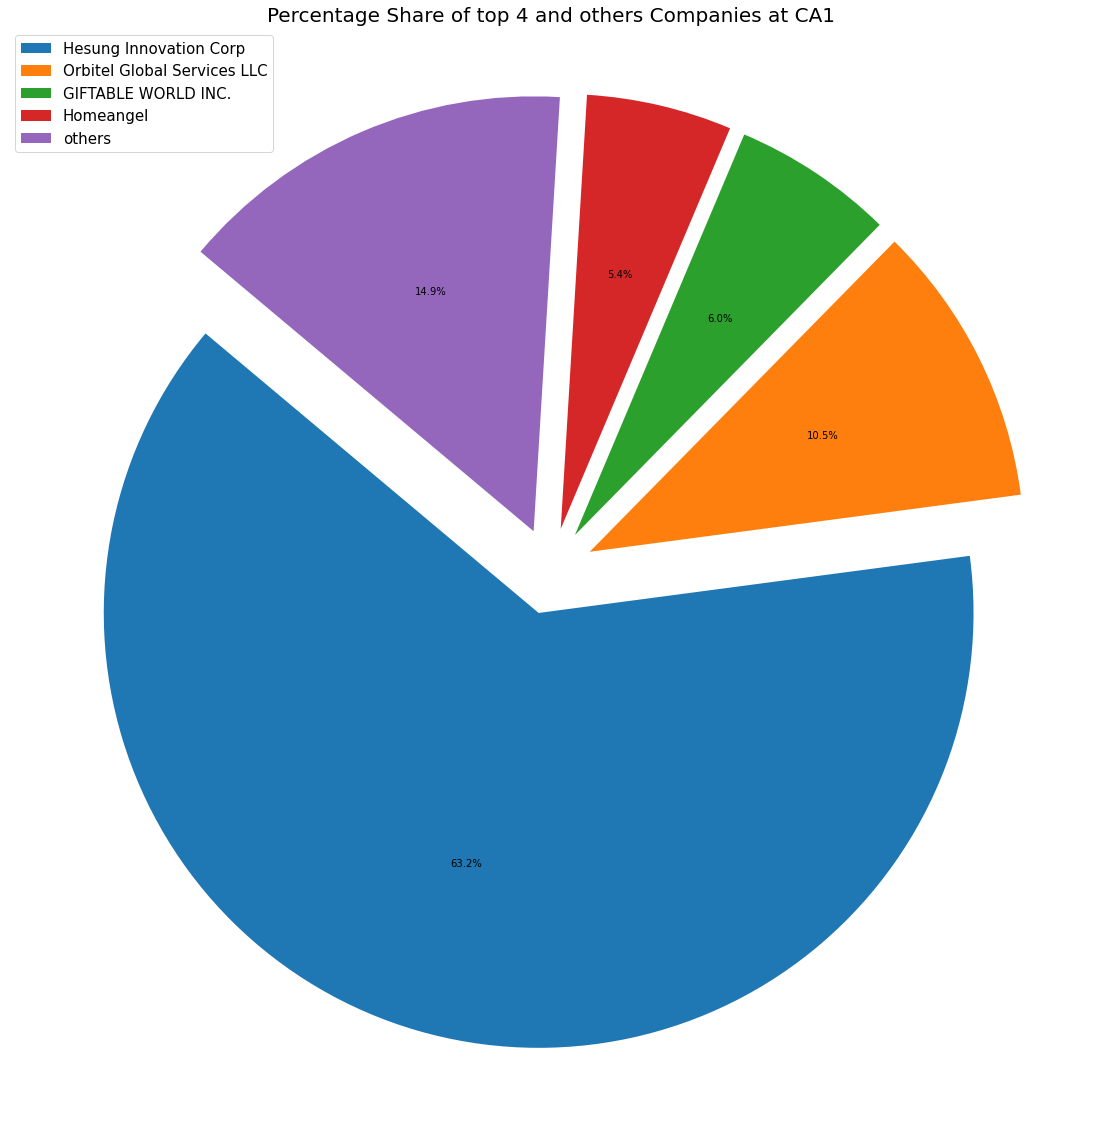

In [44]:
#pie chart on each warehouse of their top10 companies： CA1
top_4_companies_CA1 = df[df['warehouse'] == 'CA1'].groupby('company')['count'].sum().reset_index().sort_values('count',ascending=False).head(4)
others = df[df['warehouse'] == 'CA1']['count'].sum() - top_4_companies_CA1['count'].sum()
other_companies_CA1 = pd.DataFrame({'company':['others'],'count':[others]})
top_4_others_CA1 = pd.concat([top_4_companies_CA1,other_companies_CA1])
plt.figure(figsize=(20, 20))
explode = [0.1] * len(top_4_others_CA1)
# 绘制饼图
plt.pie(top_4_others_CA1['count'], autopct='%1.1f%%', startangle=140, explode=explode,)
plt.legend(labels=top_4_others_CA1['company'], loc='upper left',fontsize = 15)
# 添加标题
plt.title('Percentage Share of top 4 and others Companies at CA1',fontsize = 20)
# 显示饼图
plt.show()

/Users/gongyichen/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 28145 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/gongyichen/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 22323 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/gongyichen/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 24066 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/gongyichen/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/gongyichen/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 36259 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/gongyichen/opt/anaconda3/lib/pyth

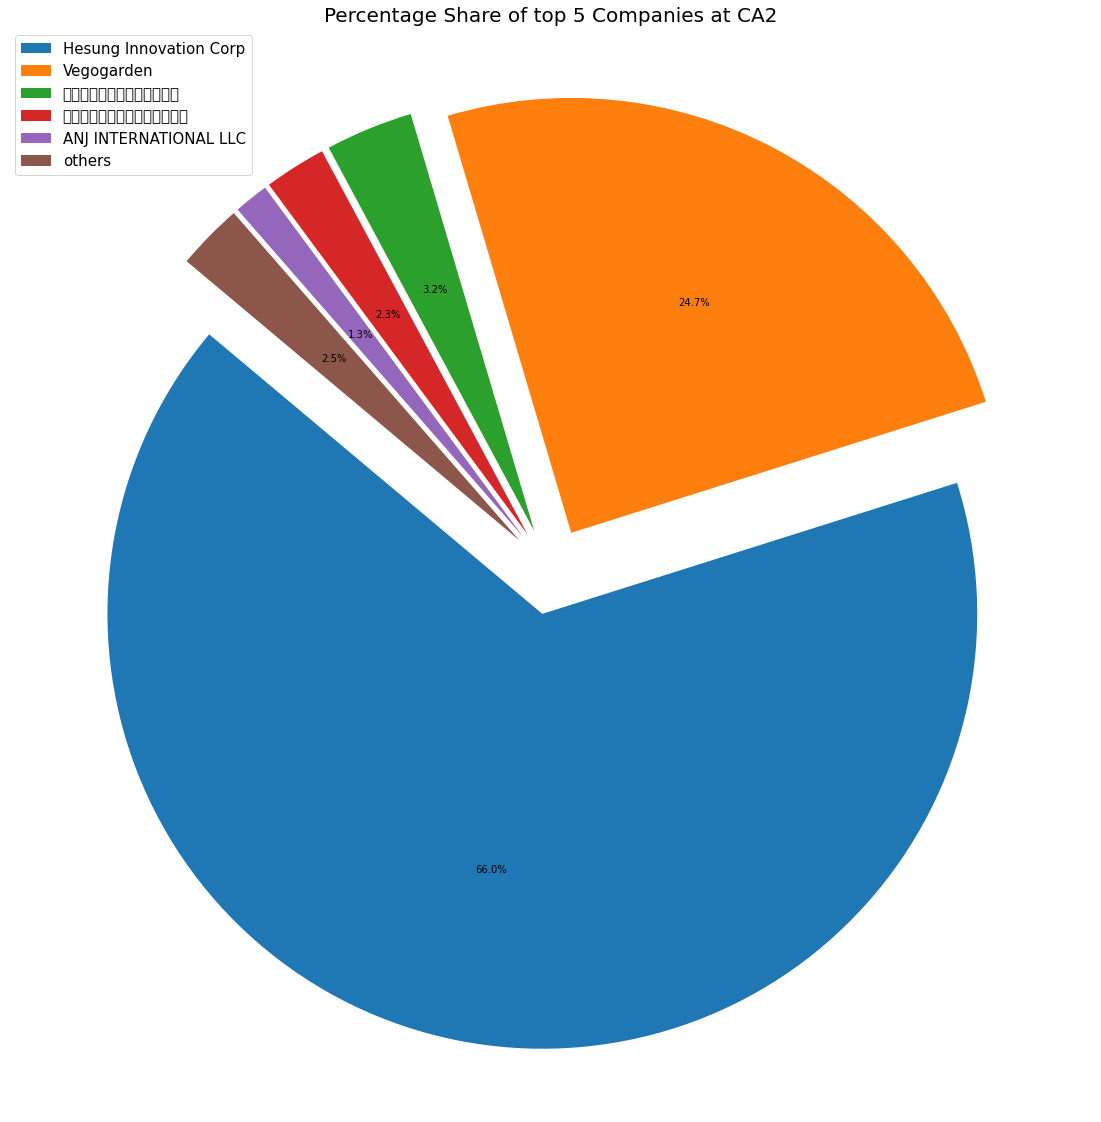

In [45]:
#pie chart on each warehouse of their top10 companies： CA2
top_5_companies_CA2 = df[df['warehouse'] == 'CA2'].groupby('company')['count'].sum().reset_index().sort_values('count',ascending=False).head(5)
others = df[df['warehouse'] == 'CA2']['count'].sum() - top_5_companies_CA2['count'].sum()
other_companies_CA2 = pd.DataFrame({'company':['others'],'count':[others]})
top_5_others_CA2 = pd.concat([top_5_companies_CA2,other_companies_CA2])
plt.figure(figsize=(20, 20))
explode = [0.1] * len(top_5_others_CA2)
# 绘制饼图
plt.pie(top_5_others_CA2['count'], autopct='%1.1f%%', startangle=140, explode=explode,)
plt.legend(labels=top_5_others_CA2['company'], loc='upper left',fontsize = 15)
# 添加标题
plt.title('Percentage Share of top 5 Companies at CA2',fontsize = 20)
# 显示饼图
plt.show()

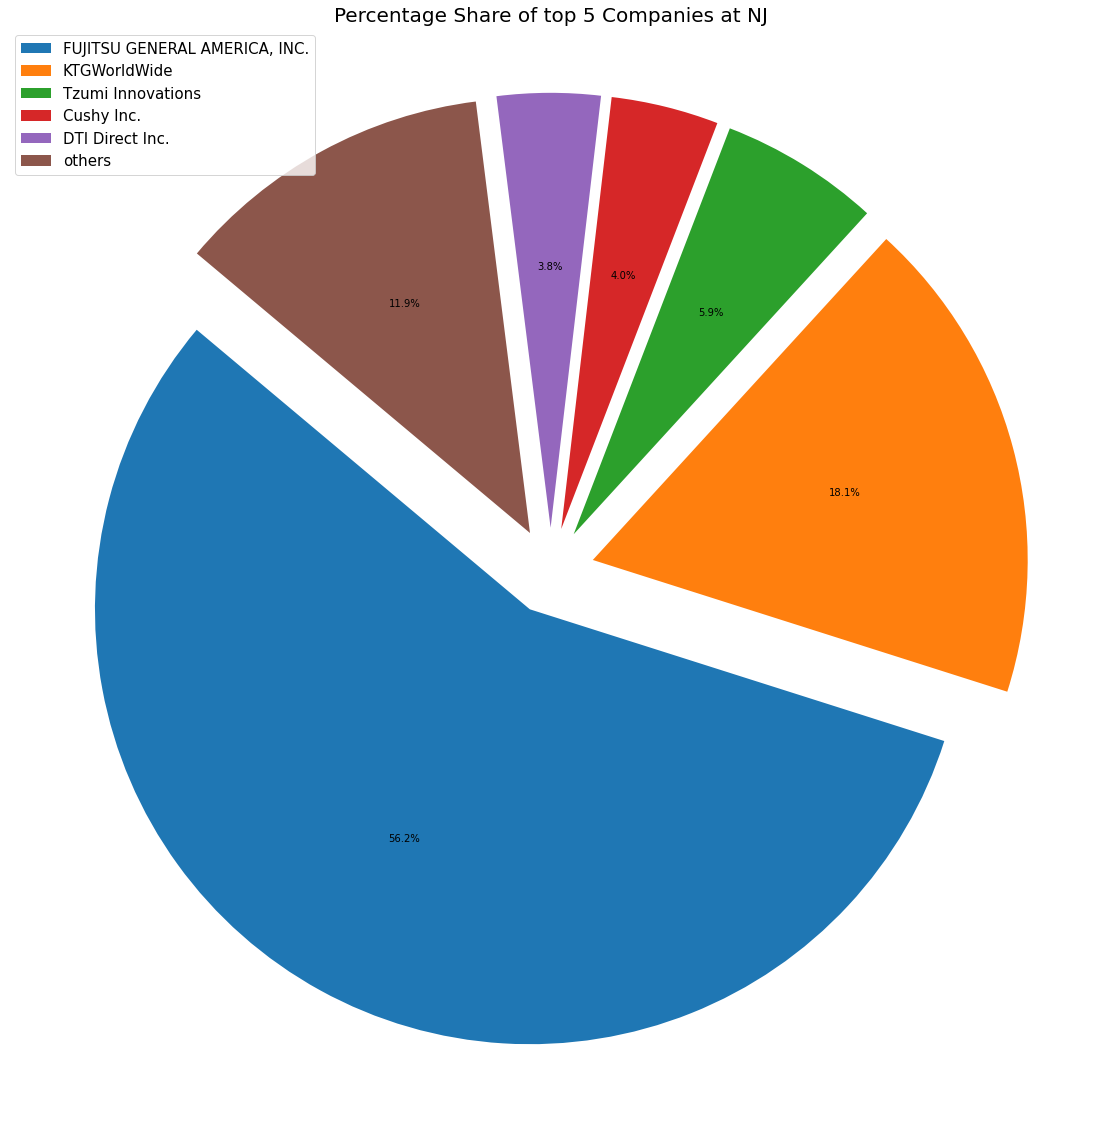

In [46]:
#pie chart on each warehouse of their top10 companies： NJ
top_5_companies_NJ = df[df['warehouse'] == 'NJ'].groupby('company')['count'].sum().reset_index().sort_values('count',ascending=False).head(5)
others = df[df['warehouse'] == 'NJ']['count'].sum() - top_5_companies_NJ['count'].sum()
other_companies_NJ = pd.DataFrame({'company':['others'],'count':[others]})
top_5_others_NJ = pd.concat([top_5_companies_NJ,other_companies_NJ])
plt.figure(figsize=(20, 20))
explode = [0.1] * len(top_5_others_NJ)
# 绘制饼图
plt.pie(top_5_others_NJ['count'], autopct='%1.1f%%', startangle=140, explode=explode,)
plt.legend(labels=top_5_others_NJ['company'], loc='upper left',fontsize = 15)
# 添加标题
plt.title('Percentage Share of top 5 Companies at NJ',fontsize = 20)
# 显示饼图
plt.show()

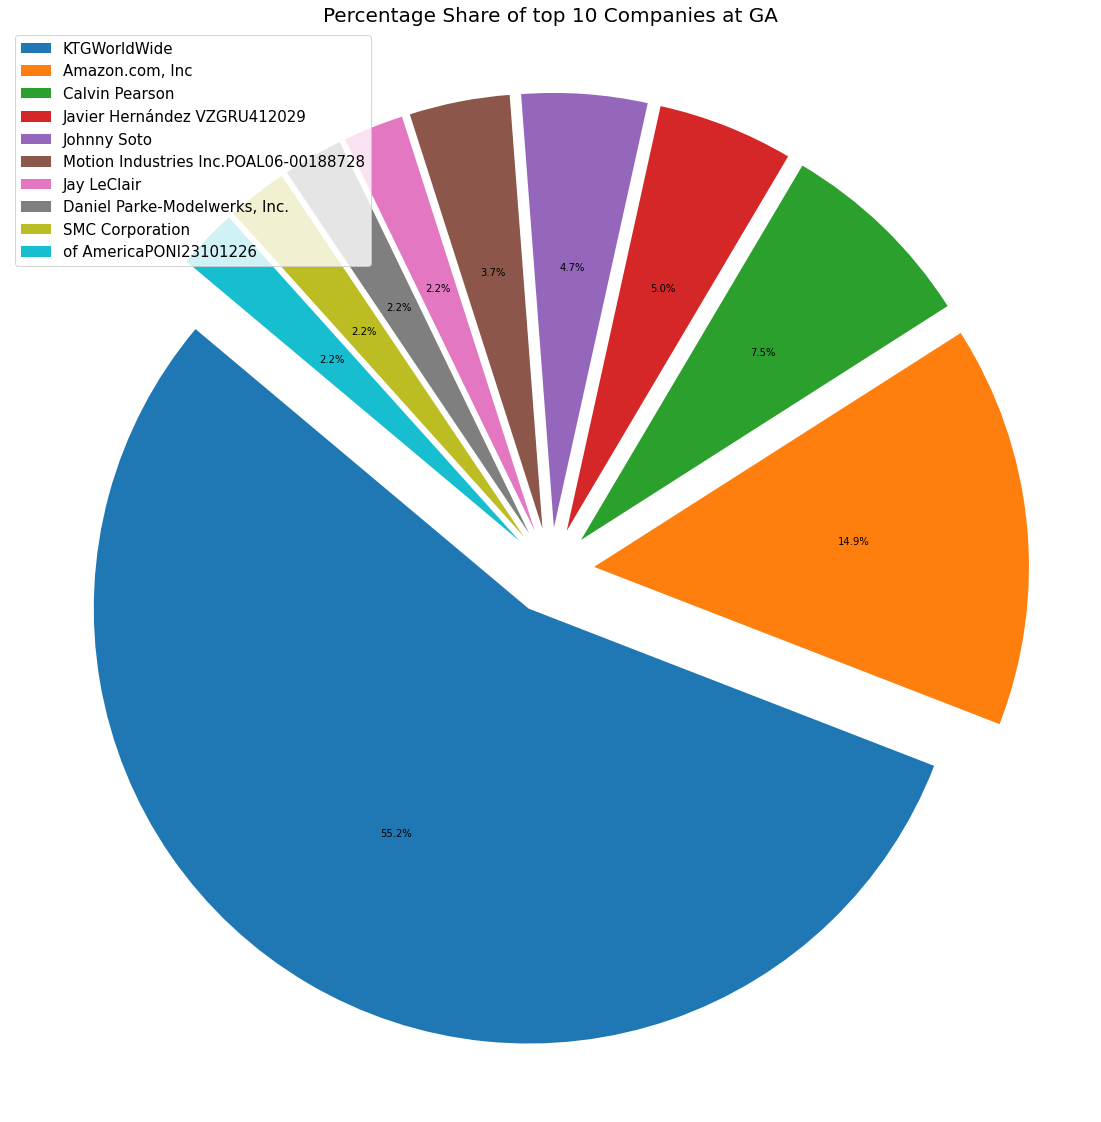

In [47]:
#pie chart on each warehouse of their top10 companies： GA
top_10_companies_GA = df[df['warehouse'] == 'GA'].groupby('company')['count'].sum().reset_index().sort_values('count',ascending=False).head(10)
plt.figure(figsize=(20, 20))
explode = [0.1] * len(top_10_companies_GA)
# 绘制饼图
plt.pie(top_10_companies_GA['count'], autopct='%1.1f%%', startangle=140, explode=explode,)
plt.legend(labels=top_10_companies_GA['company'], loc='upper left',fontsize = 15)
# 添加标题
plt.title('Percentage Share of top 10 Companies at GA',fontsize = 20)
# 显示饼图
plt.show()

/Users/gongyichen/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 26143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/gongyichen/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 36784 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/gongyichen/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 26102 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/gongyichen/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20195 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/gongyichen/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 26143 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/gongyichen/opt/anaconda3/lib/python

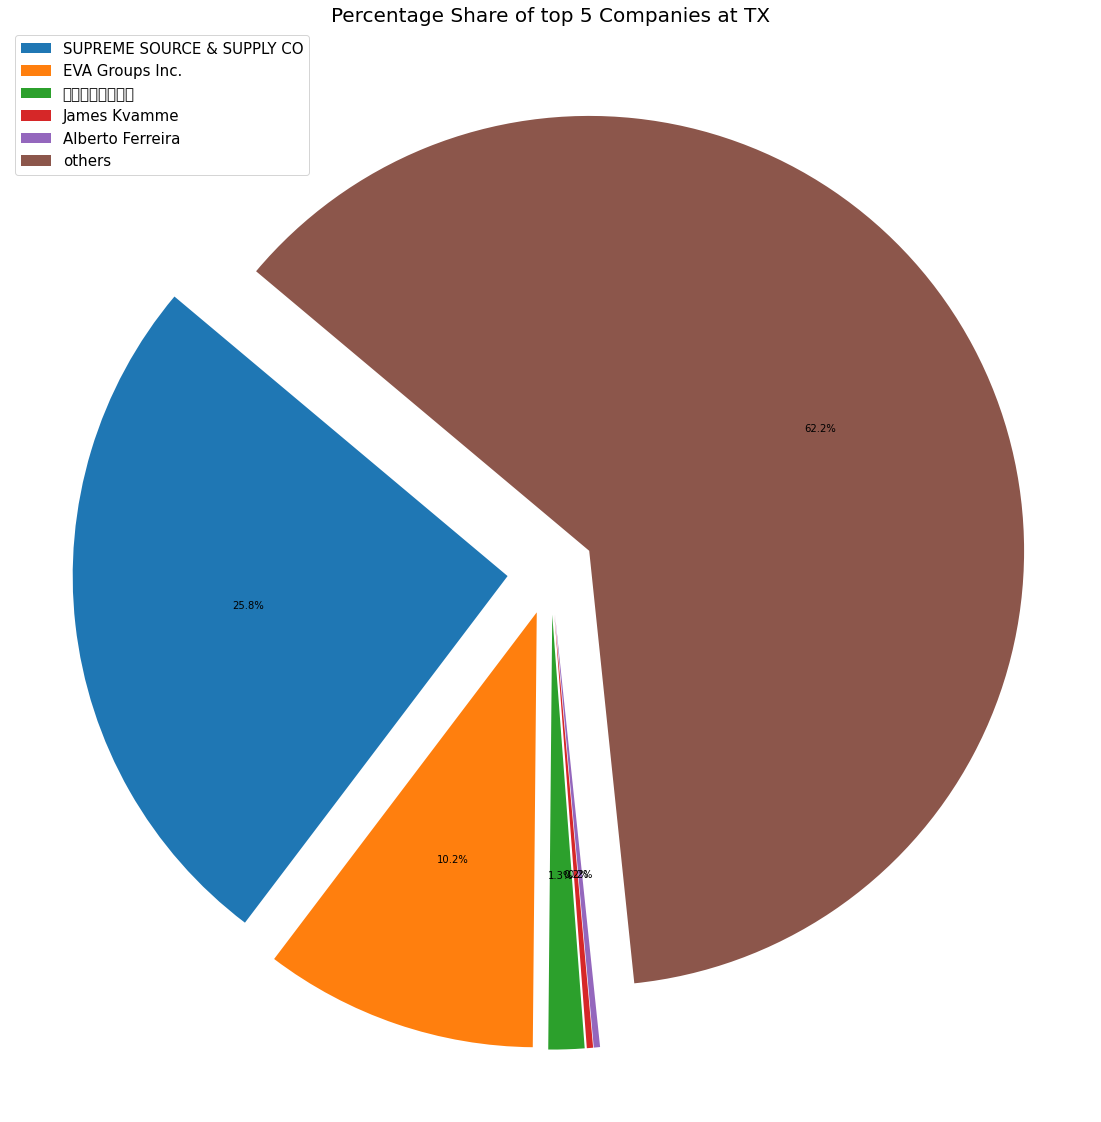

In [48]:
#pie chart on each warehouse of their top5 companies： TX
top_5_companies_TX = df[df['warehouse'] == 'TX'].groupby('company')['count'].sum().reset_index().sort_values('count',ascending=False).head(5)
others = df[df['warehouse'] == 'TX']['count'].sum() - top_5_companies_TX['count'].sum()
other_companies_TX = pd.DataFrame({'company':['others'],'count':[others]})
top_5_others_TX = pd.concat([top_5_companies_TX,other_companies_TX])
plt.figure(figsize=(20, 20))
explode = [0.1] * len(top_5_others_TX)
# 绘制饼图
plt.pie(top_5_others_TX['count'], autopct='%1.1f%%', startangle=140, explode=explode,)
plt.legend(labels=top_5_others_TX['company'], loc='upper left',fontsize = 15)
# 添加标题
plt.title('Percentage Share of top 5 Companies at TX',fontsize = 20)
# 显示饼图
plt.show()

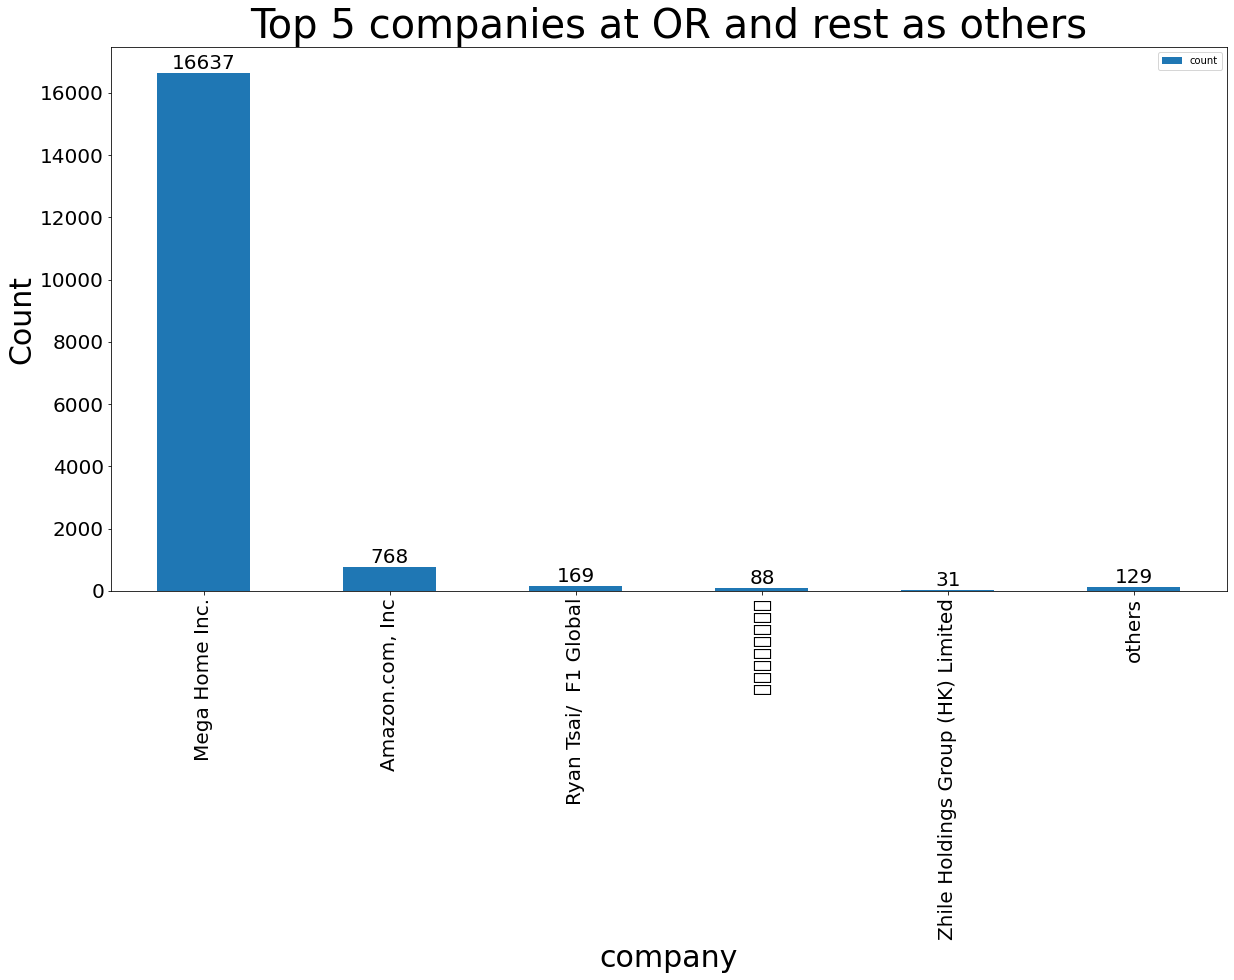

In [49]:
#bar chart on each warehouse of their top5 companies： OR
top_5_companies_OR = df[df['warehouse'] == 'OR'].groupby('company')['count'].sum().reset_index().sort_values('count',ascending=False).head(5)
others = df[df['warehouse'] == 'OR']['count'].sum() - top_5_companies_OR['count'].sum()
other_companies_OR = pd.DataFrame({'company':['others'],'count':[others]})
top_5_others_OR = pd.concat([top_5_companies_OR,other_companies_OR])
top_5_others_OR.plot('company', 'count', kind = 'bar', figsize = (20, 10),fontsize= 20)
plt.title('Top 5 companies at OR and rest as others',fontsize = 40)
plt.xlabel('company',fontsize = 30)
plt.ylabel('Count',fontsize = 30)
for bar in plt.gca().patches:  # gca() - get current axes, patches is a list of bars.
    plt.text(bar.get_x() + bar.get_width() / 2,  # x-coordinate position of text
             bar.get_height(),  # y-coordinate position of text
             f'{int(bar.get_height())}',  # Text to be displayed on top of the bar
             ha='center',  # center alignment for the text
             va='bottom',  # bottom alignment for the text
             fontsize=20)  # font size of text
plt.show()

/Users/gongyichen/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 27993 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/gongyichen/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 27743 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/gongyichen/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20094 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/gongyichen/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 35802 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/gongyichen/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20379 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/gongyichen/opt/anaconda3/lib/pyth

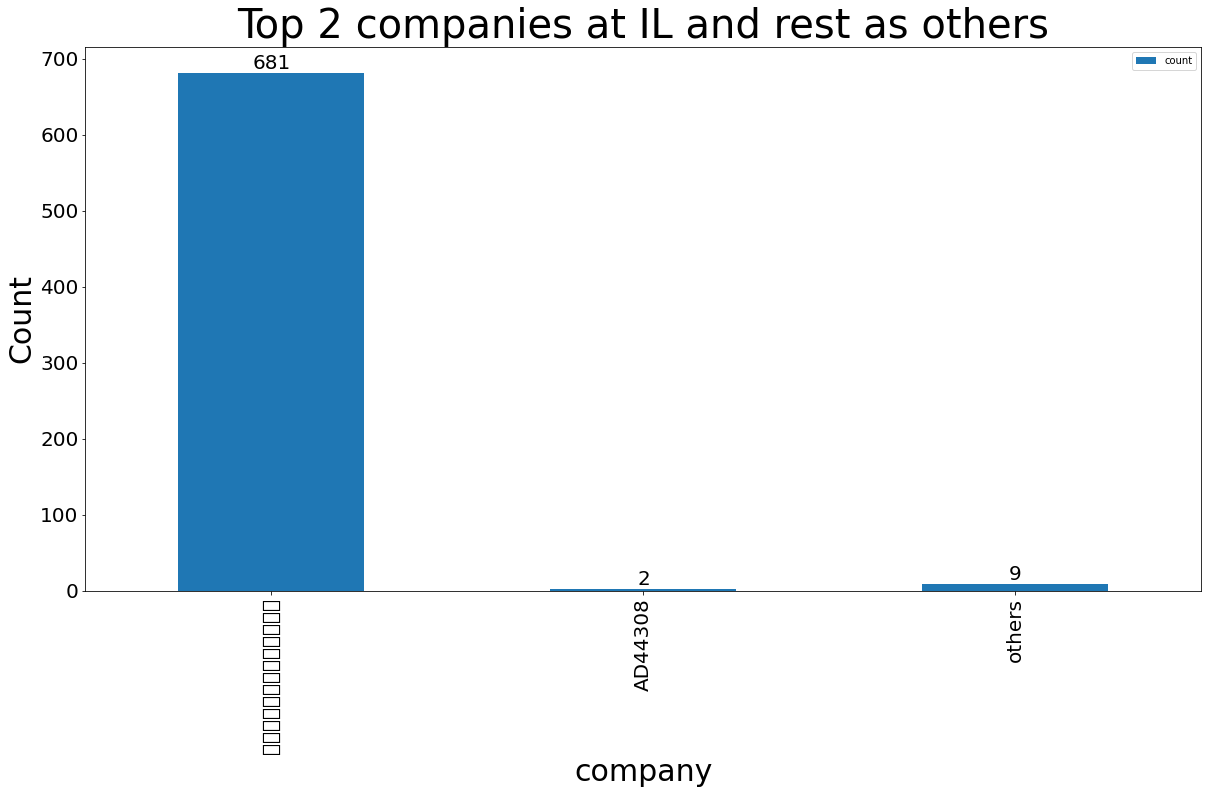

In [50]:
#bar chart on each warehouse of their top5 companies： IL (因为唯一客户占比占比太大，top10调整为top2)
#below, IL output比较零散，大部分公司的件数都只有一到两件
top_2_companies_IL = df[df['warehouse'] == 'IL'].groupby('company')['count'].sum().reset_index().sort_values('count',ascending=False).head(2)
others = df[df['warehouse'] == 'IL']['count'].sum() - top_2_companies_IL['count'].sum()
other_companies_IL = pd.DataFrame({'company':['others'],'count':[others]})
top_2_others_IL = pd.concat([top_2_companies_IL,other_companies_IL])
top_2_others_IL.plot('company', 'count', kind = 'bar', figsize = (20, 10),fontsize= 20)
plt.title('Top 2 companies at IL and rest as others',fontsize = 40)
plt.xlabel('company',fontsize = 30)
plt.ylabel('Count',fontsize = 30)
for bar in plt.gca().patches:  # gca() - get current axes, patches is a list of bars.
    plt.text(bar.get_x() + bar.get_width() / 2,  # x-coordinate position of text
             bar.get_height(),  # y-coordinate position of text
             f'{int(bar.get_height())}',  # Text to be displayed on top of the bar
             ha='center',  # center alignment for the text
             va='bottom',  # bottom alignment for the text
             fontsize=20)  # font size of text
plt.show()

In [51]:
df.groupby('company')['count'].sum().reset_index().sort_values('count',ascending=False).head(10)

,company,count
5572,Hesung Innovation Corp,144423.0
10884,Orbitel Global Services LLC,21240.0
9903,Mega Home Inc.,16637.0
4911,GIFTABLE WORLD INC.,12078.0
5609,Homeangel,10886.0
4714,"FUJITSU GENERAL AMERICA, INC.",8446.0
14514,Vegogarden,7335.0
7685,KTGWorldWide,6009.0
15021,abc,4767.0
12591,SUPREME SOURCE & SUPPLY CO,1777.0


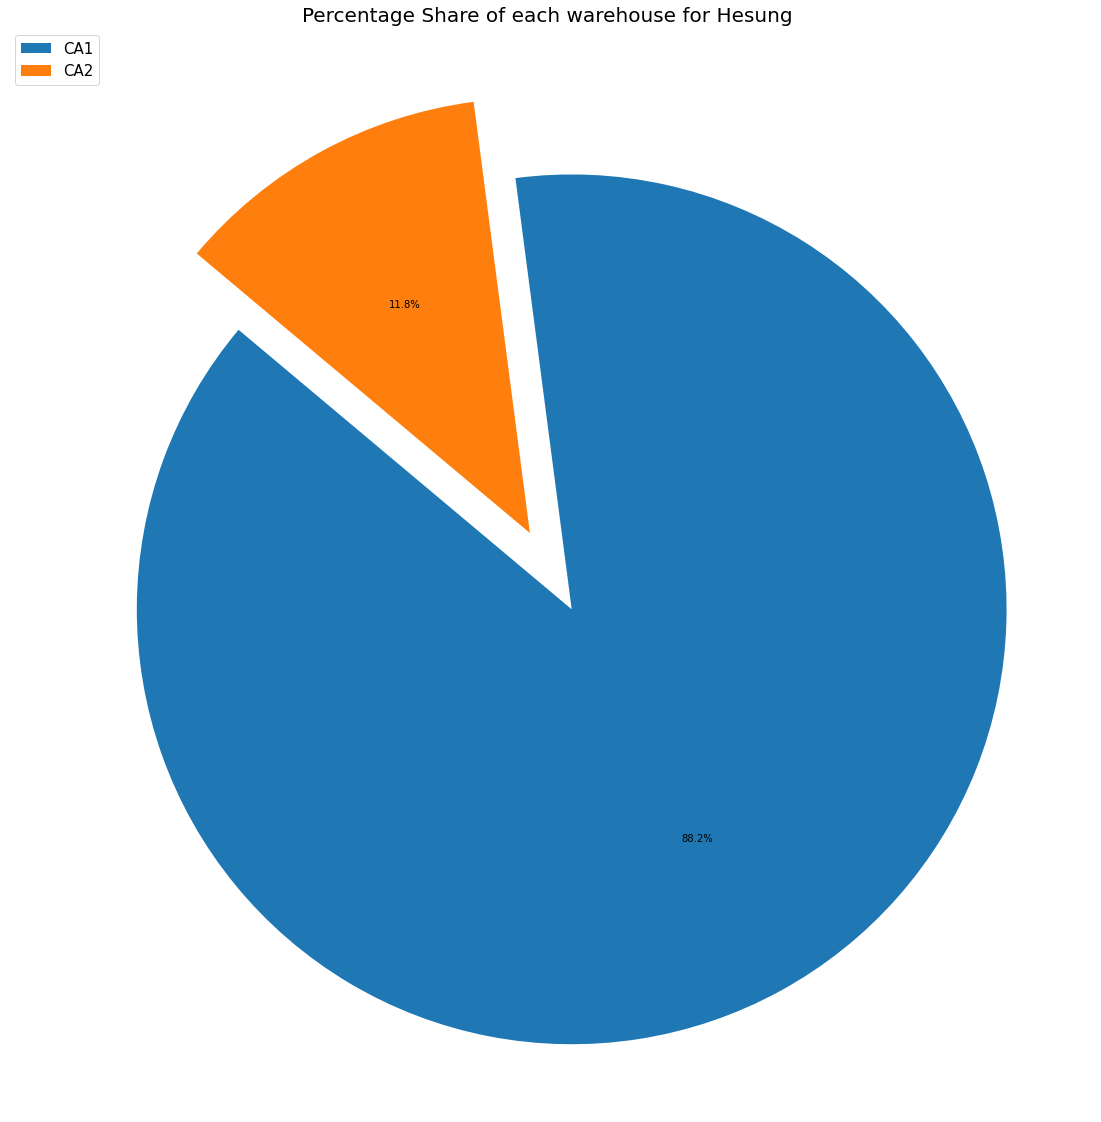

In [52]:
#for Hesung, using pie chart, show its output distribution at different warehouse
Hesung_warehouse = df[df['company'] == 'Hesung Innovation Corp'].groupby('warehouse')['count'].sum().reset_index().sort_values('count',ascending=False)
plt.figure(figsize=(20, 20))
explode = [0.1] * len(Hesung_warehouse)
# 绘制饼图
plt.pie(Hesung_warehouse['count'], autopct='%1.1f%%', startangle=140, explode=explode,)
plt.legend(labels=Hesung_warehouse['warehouse'], loc='upper left',fontsize = 15)
# 添加标题
plt.title('Percentage Share of each warehouse for Hesung ',fontsize = 20)
# 显示饼图
plt.show()

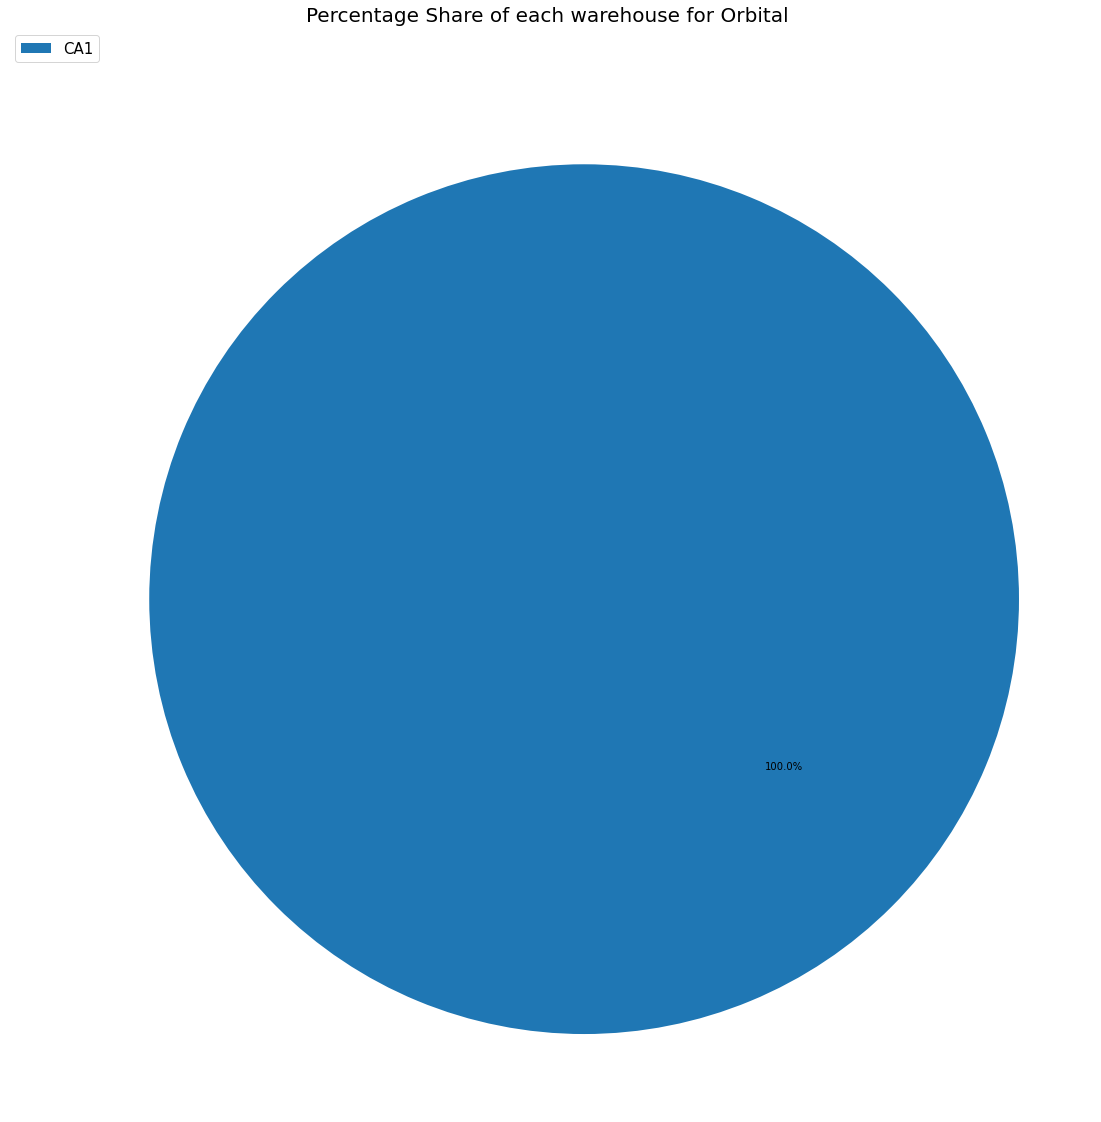

In [53]:
#for Orbital, using pie chart, show its output distribution at different warehouse
Orbital_warehouse = df[df['company'] == 'Orbitel Global Services LLC'].groupby('warehouse')['count'].sum().reset_index().sort_values('count',ascending=False)
plt.figure(figsize=(20, 20))
explode = [0.1] * len(Orbital_warehouse)
# 绘制饼图
plt.pie(Orbital_warehouse['count'], autopct='%1.1f%%', startangle=140, explode=explode,)
plt.legend(labels=Orbital_warehouse['warehouse'], loc='upper left',fontsize = 15)
# 添加标题
plt.title('Percentage Share of each warehouse for Orbital ',fontsize = 20)
# 显示饼图
plt.show()

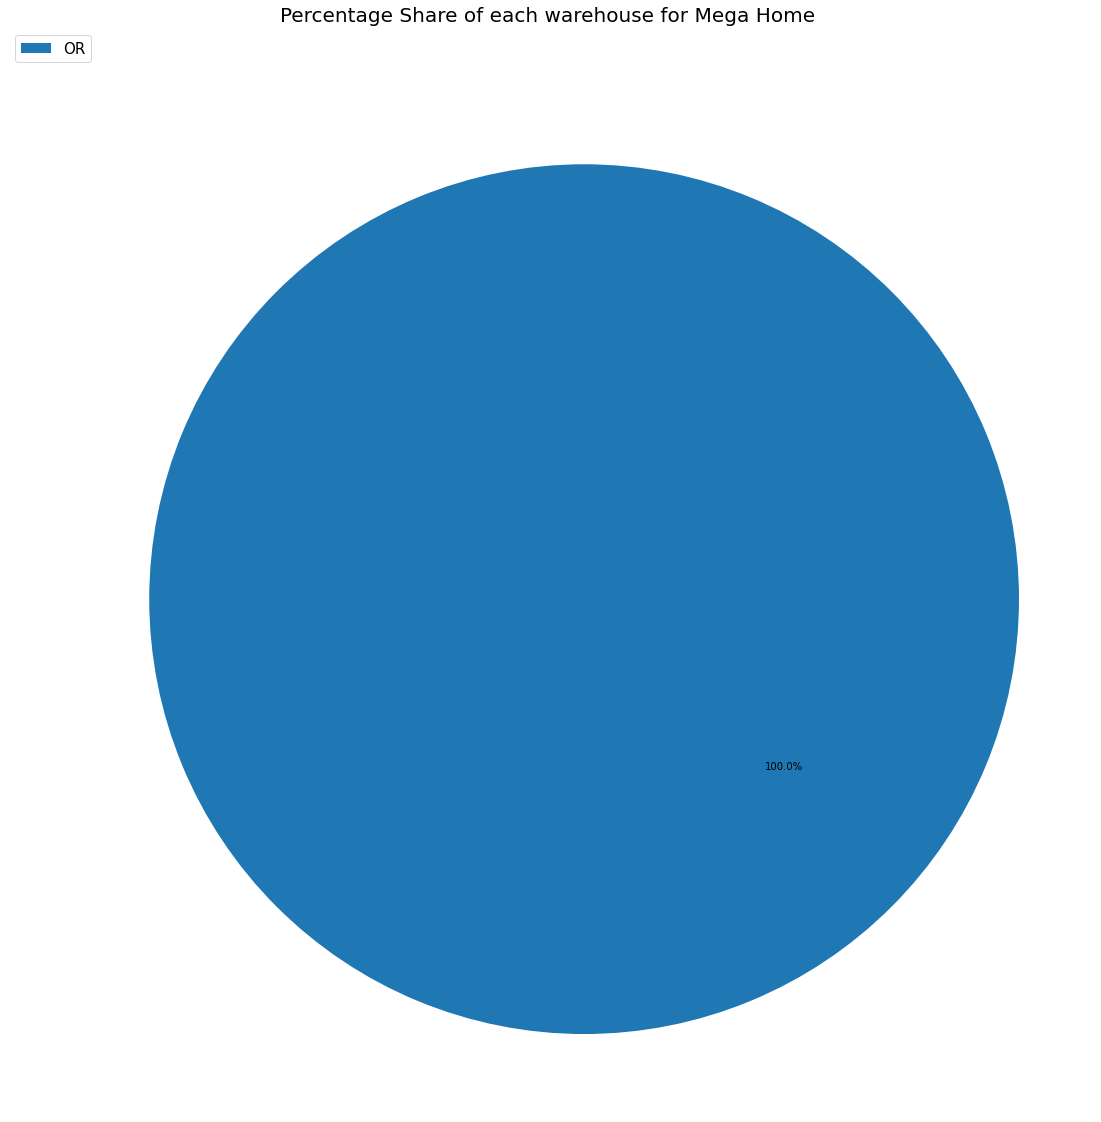

In [54]:
#for Mega home inc, using pie chart, show its output distribution at different warehouse
Mega_home_warehouse = df[df['company'] == 'Mega Home Inc.'].groupby('warehouse')['count'].sum().reset_index().sort_values('count',ascending=False)
plt.figure(figsize=(20, 20))
explode = [0.1] * len(Mega_home_warehouse)
# 绘制饼图
plt.pie(Mega_home_warehouse['count'], autopct='%1.1f%%', startangle=140, explode=explode,)
plt.legend(labels=Mega_home_warehouse['warehouse'], loc='upper left',fontsize = 15)
# 添加标题
plt.title('Percentage Share of each warehouse for Mega Home ',fontsize = 20)
# 显示饼图
plt.show()

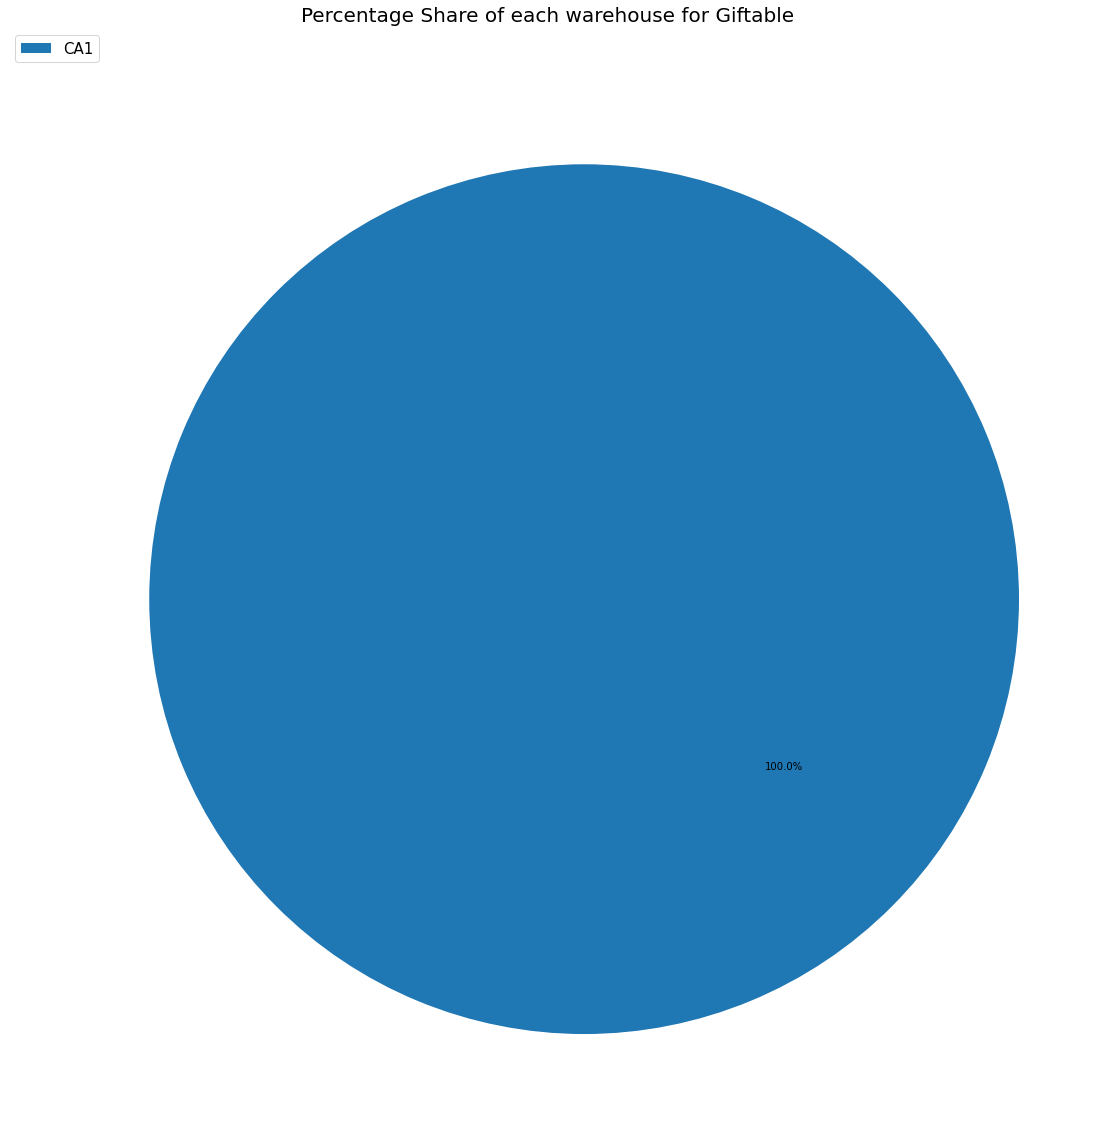

In [55]:
#for Giftable, using pie chart, show its output distribution at different warehouse
Giftable_warehouse = df[df['company'] == 'GIFTABLE WORLD INC.'].groupby('warehouse')['count'].sum().reset_index().sort_values('count',ascending=False)
plt.figure(figsize=(20, 20))
explode = [0.1] * len(Giftable_warehouse)
# 绘制饼图
plt.pie(Giftable_warehouse['count'], autopct='%1.1f%%', startangle=140, explode=explode,)
plt.legend(labels=Giftable_warehouse['warehouse'], loc='upper left',fontsize = 15)
# 添加标题
plt.title('Percentage Share of each warehouse for Giftable ',fontsize = 20)
# 显示饼图
plt.show()

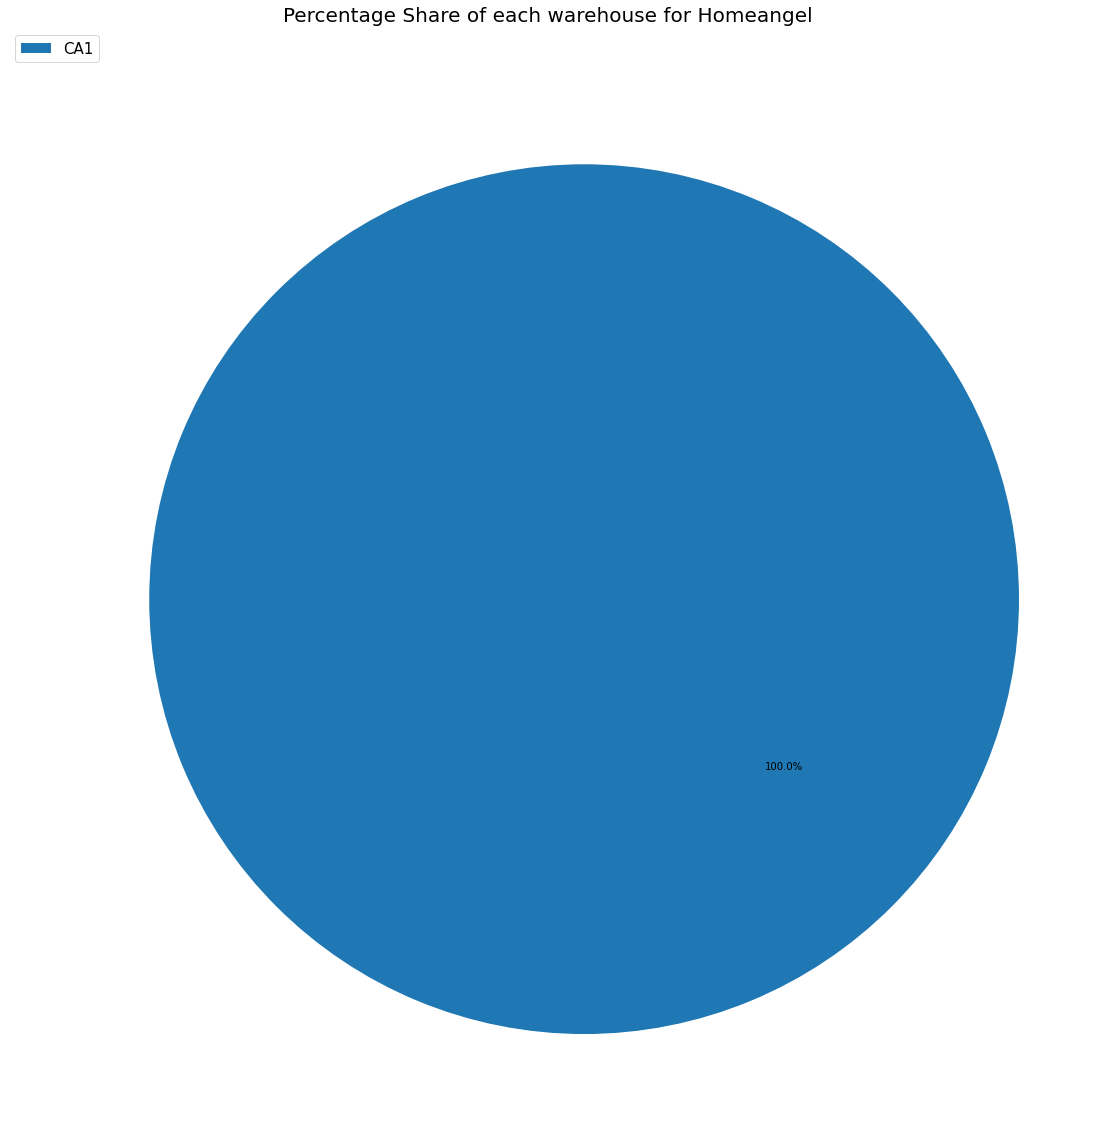

In [56]:
#for Homeangel, using pie chart, show its output distribution at different warehouse
Homeangel_warehouse = df[df['company'] == 'Homeangel'].groupby('warehouse')['count'].sum().reset_index().sort_values('count',ascending=False)
plt.figure(figsize=(20, 20))
explode = [0.1] * len(Homeangel_warehouse)
# 绘制饼图
plt.pie(Homeangel_warehouse['count'], autopct='%1.1f%%', startangle=140, explode=explode,)
plt.legend(labels=Homeangel_warehouse['warehouse'], loc='upper left',fontsize = 15)
# 添加标题
plt.title('Percentage Share of each warehouse for Homeangel ',fontsize = 20)
# 显示饼图
plt.show()

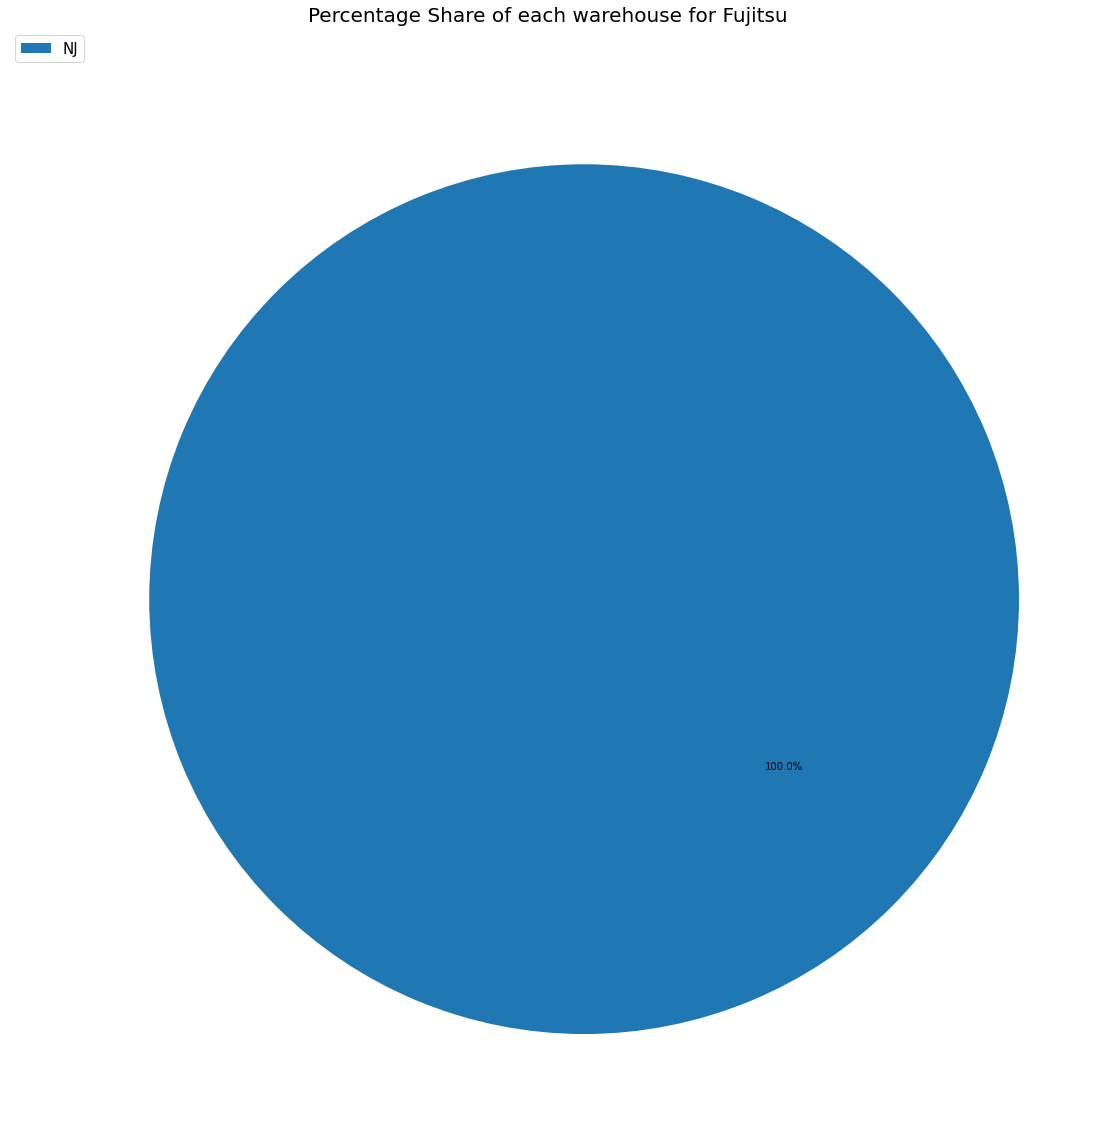

In [57]:
#for FUJITSU GENERAL AMERICA, INC, using pie chart, show its output distribution at different warehouse
Fujitsu_warehouse = df[df['company'] == 'FUJITSU GENERAL AMERICA, INC.'].groupby('warehouse')['count'].sum().reset_index().sort_values('count',ascending=False)
plt.figure(figsize=(20, 20))
explode = [0.1] * len(Fujitsu_warehouse)
# 绘制饼图
plt.pie(Fujitsu_warehouse['count'], autopct='%1.1f%%', startangle=140, explode=explode,)
plt.legend(labels=Fujitsu_warehouse['warehouse'], loc='upper left',fontsize = 15)
# 添加标题
plt.title('Percentage Share of each warehouse for Fujitsu ',fontsize = 20)
# 显示饼图
plt.show()

In [58]:
top_5_others_CA2.to_excel('top_5_others_CA2.xlsx',index=False)
top_5_others_NJ.to_excel('top_5_companies_NJ.xlsx',index=False)
top_5_others_TX.to_excel('top_5_companies_TX.xlsx',index=False)
top_4_others_CA1.to_excel('top_4_others_CA1.xlsx',index=False)